[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/boostcourse-ds-510/blob/master/open-data-analysis-input.ipynb)


# 공공데이터 상권정보 분석해 보기
* https://www.data.go.kr/dataset/15012005/fileData.do
* 국가중점데이터인 상권정보를 살펴봅니다.
* 처음으로 파일데이터에서 `상가(상권)정보_의료기관_201909`를 다운로드 받아봅니다.

## 필요한 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 시각화를 위한 폰트 설정

In [2]:
# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# !pip install koreanize-matplotlib

# import koreanize_matplotlib

In [3]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
# Window 의 한글 폰트 설정
plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
# plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

# 폰트가 선명하게 보이기 위해 - 그래프에 retina display 적용
# retina 대신 svg 등의 설정을 할 수도 있으며
# 디스플레이(모니터)가 retina 를 지원해야만 선명한 차이를 볼 수 있습니다.
%config InlineBackend.figure_format = 'retina'

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

## 데이터 로드하기
* 판다스에서 데이터를 로드할 때는 read_csv를 사용합니다.
* 데이터를 로드해서 df라는 변수에 담습니다.
* 그리고 shape 를 통해 데이터의 갯수를 찍습니다. 결과는 (행, 열) 순으로 출력됩니다.

In [4]:
!pip install openpyxl

In [5]:
df = pd.read_csv('./data.csv', low_memory=False)
df.shape

(91335, 39)

## 데이터 미리보기
* head, tail 을 통해 데이터를 미리 볼 수 있습니다.

In [6]:
# head 로 데이터를 미리보기 합니다.
df.head()

상가업소번호        상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
0  19956873     하나산부인과  NaN         S       의료       S01       병원    S01B10   
1  20024149   타워광명내과의원  NaN         S       의료       S01       병원    S01B07   
2  20152277  조정현신경외과의원  NaN         S       의료       S01       병원    S01B15   
3  20350610   한귀원정신과의원  NaN         S       의료       S01       병원    S01B99   
4  20364049  더블유스토어수지점  수지점         S       의료       S02   약국/한약방    S02A01   

  상권업종소분류명 표준산업분류코드  ...        건물관리번호      건물명                도로명주소  \
0     산부인과   Q86201  ...  4.127310e+24  산호한양아파트   경기도 안산시 단원구 달미로 10   
1    내과/외과   Q86201  ...  1.168010e+24      NaN  서울특별시 강남구 언주로30길 39   
2     신경외과   Q86201  ...  4.139010e+24    한라프라자    경기도 시흥시 중심상가로 178   
3     기타병원      NaN  ...  2.650010e+24      NaN    부산광역시 수영구 수영로 688   
4       약국   G47811  ...  4.146510e+24      NaN   경기도 용인시 수지구 문정로 32   

      구우편번호    신우편번호  동정보  층정보  호정보          경도         위도  
0  425764.0  15236.0  NaN  NaN  NaN  126.814295  37.336344  
1  135270.0   6292.0  NaN  4.0  NaN  127.053198  37.488742  
2  429450.0  15066.0  NaN  NaN  NaN  126.734841  37.344955  
3  613100.0  48266.0  NaN  5.0  NaN  129.115438  35.166872  
4  448170.0  16837.0  NaN  1.0  NaN  127.095522  37.323528  

[5 rows x 39 columns]

In [7]:
# tail 로 마지막 부분에 있는 데이터를 불러옵니다.
df.tail()

상가업소번호           상호명   지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  상권업종중분류명  \
91330  16196725         온누리약국   베스트         S       의료       S02    약국/한약방   
91331  16192180            리원  봄산후조         S       의료       S07  의료관련서비스업   
91332  16127538       참좋은요양병원   NaN         S       의료       S01        병원   
91333  16108681       경희중앙한의원   NaN         S       의료       S01        병원   
91334  16109073  천안김안과천안역본점의원   NaN         S       의료       S01        병원   

      상권업종소분류코드 상권업종소분류명 표준산업분류코드  ...        건물관리번호    건물명  \
91330    S02A01       약국   G47811  ...  3.017010e+24    NaN   
91331    S07A07    산후조리원   S96993  ...  4.128110e+24  청한프라자   
91332    S01B17  노인/치매병원   Q86102  ...  2.641010e+24  한신시티빌   
91333    S01B06      한의원   Q86203  ...  1.174010e+24    NaN   
91334    S01B13     안과의원   Q86201  ...  4.413110e+24    김안과   

                     도로명주소     구우편번호    신우편번호  동정보  층정보  호정보          경도  \
91330      대전광역시 서구 문예로 67  302831.0  35240.0  NaN  NaN  NaN  127.389865   
91331   경기도 고양시 덕양구 성신로 14  412827.0  10503.0  NaN  NaN  NaN  126.830144   
91332    부산광역시 금정구 금강로 209  609841.0  46294.0  NaN  2.0  NaN  129.082790   
91333    서울특별시 강동구 천중로 213  134811.0   5303.0  NaN  NaN  NaN  127.143958   
91334  충청남도 천안시 동남구 중앙로 92  330952.0  31127.0  NaN  NaN  NaN  127.152651   

              위도  
91330  36.352728  
91331  37.627530  
91332  35.227138  
91333  37.540993  
91334  36.806640  

[5 rows x 39 columns]

In [8]:
# sample 로 미리보기를 합니다.
df.sample(1)

상가업소번호      상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
80396  12277260  미래메디칼의원  NaN         S       의료       S01       병원    S01B02   

      상권업종소분류명 표준산업분류코드  ...        건물관리번호     건물명             도로명주소  \
80396     일반병원   Q86102  ...  4.420010e+24  온양상설시장  충청남도 아산시 시민로 400   

          구우편번호    신우편번호  동정보  층정보  호정보         경도        위도  
80396  336011.0  31513.0  NaN  1.0  NaN  127.00162  36.78403  

[1 rows x 39 columns]

## 데이터 요약하기

### 요약정보

In [9]:
# info로 데이터의 요약을 봅니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  float64
 20  대지구분코드

### 컬럼명 보기

In [10]:
# 컬럼명만 출력해 봅니다.
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

### 데이터 타입

In [11]:
# 데이터 타입만 출력합니다.
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드         float64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드        float64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호       float64
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보          float64
호정보          float64
경도           float64
위도           float64
dtype: object

## 결측치

In [12]:
null_cnt = df.isnull().sum()
null_cnt

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47346
호정보          75898
경도               0
위도               0
dtype: int64

<Axes: >

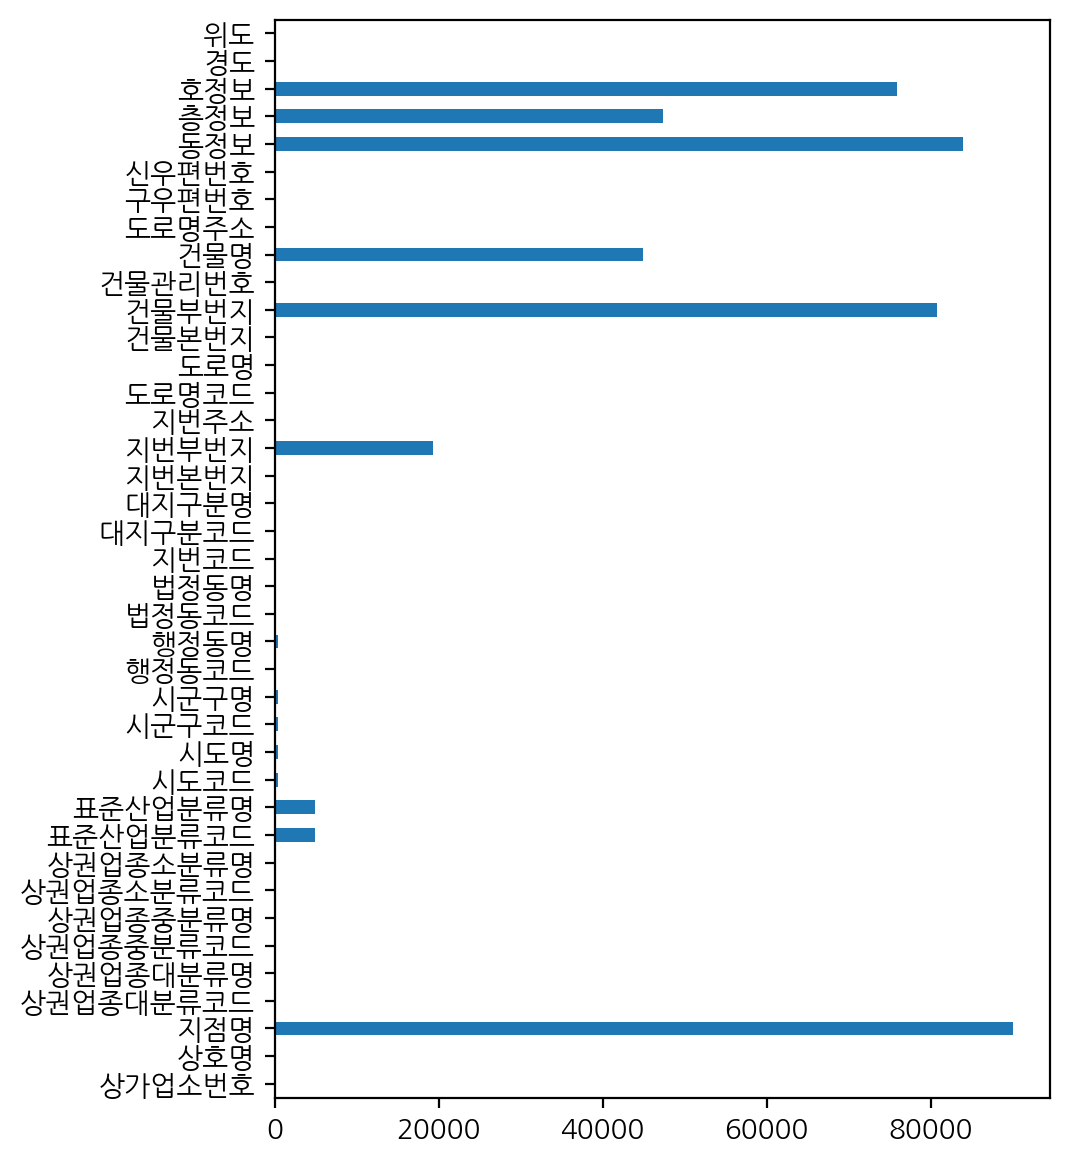

In [58]:
# 위에서 구한 결측치를 .plot.bar 를 통해 막대그래프로 표현합니다.
null_cnt.plot.barh(figsize=(5,7))

In [14]:
# 위에서 계산한 결측치 수를 reset_index 를 통해 데이터프레임으로 만들어 줍니다.
# df_null_count 변수에 결과를 담아서 head 로 미리보기를 합니다.

df_null_cnt = null_cnt.reset_index()
df_null_cnt.head()

index      0
0     상가업소번호      0
1        상호명      0
2        지점명  89989
3  상권업종대분류코드      0
4   상권업종대분류명      0

## 컬럼명 변경하기

In [15]:
# df_null_count 변수에 담겨있는 컬럼의 이름을 "컬럼명", "결측치수"로 변경해 줍니다.
df_null_cnt.columns = ["컬럼명", "결측치수"]
df_null_cnt.head()

컬럼명   결측치수
0     상가업소번호      0
1        상호명      0
2        지점명  89989
3  상권업종대분류코드      0
4   상권업종대분류명      0

## 정렬하기

In [16]:
# df_null_count 데이터프레임에 있는 결측치수 컬럼을 sort_values 를 통해 정렬해서
# 결측치가 많은 순으로 상위 10개만 출력합니다.
df_null_cnt_top  = df_null_cnt.sort_values(by='결측치수', ascending=False).head(10)

## 특정 컬럼만 불러오기

In [17]:
# 지점명 컬럼을 불러옵니다.
df['지점명'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    수지점
Name: 지점명, dtype: object

In [18]:
# "컬럼명" 이라는 컬럼의 값만 가져와서 drop_columns 라는 변수에 담습니다.
drop_columns = df_null_cnt_top['컬럼명'].tolist()
drop_columns

['지점명',
 '동정보',
 '건물부번지',
 '호정보',
 '층정보',
 '건물명',
 '지번부번지',
 '표준산업분류코드',
 '표준산업분류명',
 '시도코드']

In [19]:
# drop_columns 변수로 해당 컬럼 정보만 데이터프레임에서 가져옵니다.
df[drop_columns].head()

지점명  동정보  건물부번지  호정보  층정보      건물명  지번부번지 표준산업분류코드         표준산업분류명  시도코드
0  NaN  NaN    NaN  NaN  NaN  산호한양아파트    NaN   Q86201           일반 의원  41.0
1  NaN  NaN    NaN  NaN  4.0      NaN   14.0   Q86201           일반 의원  11.0
2  NaN  NaN    NaN  NaN  NaN    한라프라자    1.0   Q86201           일반 의원  41.0
3  NaN  NaN    NaN  NaN  5.0      NaN    1.0      NaN             NaN  26.0
4  수지점  NaN    NaN  NaN  1.0      NaN    2.0   G47811  의약품 및 의료용품 소매업  41.0

## 제거하기

In [20]:
df = df.drop(drop_columns, axis=1)

In [21]:
df.shape

(91335, 29)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   상권업종대분류코드  91335 non-null  object 
 3   상권업종대분류명   91335 non-null  object 
 4   상권업종중분류코드  91335 non-null  object 
 5   상권업종중분류명   91335 non-null  object 
 6   상권업종소분류코드  91335 non-null  object 
 7   상권업종소분류명   91335 non-null  object 
 8   시도명        90956 non-null  object 
 9   시군구코드      90956 non-null  float64
 10  시군구명       90956 non-null  object 
 11  행정동코드      91335 non-null  int64  
 12  행정동명       90956 non-null  object 
 13  법정동코드      91280 non-null  float64
 14  법정동명       91280 non-null  object 
 15  지번코드       91335 non-null  float64
 16  대지구분코드     91335 non-null  int64  
 17  대지구분명      91335 non-null  object 
 18  지번본번지      91335 non-null  int64  
 19  지번주소       91335 non-null  object 
 20  도로명코드 

## 기초 통계값 보기

### 기초 통계 수치

In [23]:
# 평균값
df['위도'].mean()

36.62471119236065

In [24]:
# 중앙값
df['위도'].median()

37.23465232

In [25]:
# 최댓값
df['위도'].max()

38.49965857

In [26]:
# 최솟값
df['위도'].min()

33.21928967

In [27]:
# 개수
df['위도'].count()

91335

### 기초통계값 요약하기 - describe

describe 를 사용하면 데이터를 요약해 볼 수 있습니다.
기본적으로 수치형 데이터를 요약해서 보여줍니다.
데이터의 갯수, 평균, 표준편차, 최솟값,
1사분위수(25%), 2사분위수(50%), 3사분위수(75%), 최댓값을 볼 수 있습니다.

In [28]:
# 위도를 describe로 요약해 봅니다.
df['위도'].describe()

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

In [29]:
# 2개의 컬럼을 describe 로 요약합니다.
df[['위도', '경도']].describe()

위도            경도
count  91335.000000  91335.000000
mean      36.624711    127.487524
std        1.041361      0.842877
min       33.219290    124.717632
25%       35.811830    126.914297
50%       37.234652    127.084551
75%       37.507463    128.108919
max       38.499659    130.909912

In [30]:
# describe로 문자열 데이터타입의 요약을 봅니다.
df.describe(include='object') # 결측치를 제거하고 보여줌

상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드 상권업종소분류명    시도명  \
count   91335     91335    91335     91335    91335     91335    91335  90956   
unique  56910         1        1         5        5        34       34     17   
top        리원         S       의료       S01       병원    S02A01       약국    경기도   
freq      152     91335    91335     60774    60774     18964    18964  21374   

         시군구명   행정동명   법정동명  대지구분명                  지번주소             도로명  \
count   90956  90956  91280  91335                 91335           91335   
unique    228   2791   2822      2                 53118           16610   
top        서구    중앙동     중동     대지  서울특별시 동대문구 제기동 965-1  서울특별시 강남구 강남대로   
freq     3165   1856    874  91213                   198             326   

                        도로명주소  
count                   91335  
unique                  54031  
top     서울특별시 동대문구 약령중앙로8길 10  
freq                      198

### 중복제거한 값 보기
* unique 로 중복을 제거한 값을 보고 nunique 로 갯수를 세어봅니다.

In [31]:
# "상권업종대분류명"
df['상권업종대분류명'].unique()

array(['의료'], dtype=object)

In [32]:
df['상권업종대분류명'].nunique()

1

In [33]:
# "상권업종중분류명"
df['상권업종중분류명'].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [34]:
df['상권업종중분류명'].nunique()

5

In [35]:
# "상권업종소분류명"
df['상권업종소분류명'].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [36]:
df['상권업종소분류명'].nunique()

34

In [37]:
# nunique 대신 len 을 사용할 수도 있습니다.
len(df['상권업종소분류명'].unique())

34

### 그룹화된 요약값 보기 - value_counts
* value_counts 를 사용하면 카테고리 형태의 데이터 갯수를 세어볼 수 있습니다.

In [38]:
# value_counts 를 사용하면 카테고리 형태의 데이터 갯수를 세어볼 수 있습니다.
# 시도코드를 세어봅니다.
df

상가업소번호           상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  상권업종중분류명  \
0      19956873        하나산부인과         S       의료       S01        병원   
1      20024149      타워광명내과의원         S       의료       S01        병원   
2      20152277     조정현신경외과의원         S       의료       S01        병원   
3      20350610      한귀원정신과의원         S       의료       S01        병원   
4      20364049     더블유스토어수지점         S       의료       S02    약국/한약방   
...         ...           ...       ...      ...       ...       ...   
91330  16196725         온누리약국         S       의료       S02    약국/한약방   
91331  16192180            리원         S       의료       S07  의료관련서비스업   
91332  16127538       참좋은요양병원         S       의료       S01        병원   
91333  16108681       경희중앙한의원         S       의료       S01        병원   
91334  16109073  천안김안과천안역본점의원         S       의료       S01        병원   

      상권업종소분류코드 상권업종소분류명    시도명    시군구코드  ...                     지번주소  \
0        S01B10     산부인과    경기도  41273.0  ...     경기도 안산시 단원구 선부동 1081   
1        S01B07    내과/외과  서울특별시  11680.0  ...     서울특별시 강남구 도곡동 467-14   
2        S01B15     신경외과    경기도  41390.0  ...       경기도 시흥시 정왕동 1740-1   
3        S01B99     기타병원  부산광역시  26500.0  ...       부산광역시 수영구 광안동 74-1   
4        S02A01       약국    경기도  41465.0  ...   경기도 용인시 수지구 풍덕천동 712-2   
...         ...      ...    ...      ...  ...                      ...   
91330    S02A01       약국  대전광역시  30170.0  ...        대전광역시 서구 둔산동 1507   
91331    S07A07    산후조리원    경기도  41281.0  ...     경기도 고양시 덕양구 화정동 1146   
91332    S01B17  노인/치매병원  부산광역시  26410.0  ...      부산광역시 금정구 장전동 538-1   
91333    S01B06      한의원  서울특별시  11740.0  ...       서울특별시 강동구 길동 345-9   
91334    S01B13     안과의원   충청남도  44131.0  ...  충청남도 천안시 동남구 원성동 266-17   

              도로명코드               도로명  건물본번지        건물관리번호  \
0      4.127330e+11   경기도 안산시 단원구 달미로     10  4.127310e+24   
1      1.168040e+11  서울특별시 강남구 언주로30길     39  1.168010e+24   
2      4.139030e+11     경기도 시흥시 중심상가로    178  4.139010e+24   
3      2.650030e+11     부산광역시 수영구 수영로    688  2.650010e+24   
4      4.146530e+11   경기도 용인시 수지구 문정로     32  4.146510e+24   
...             ...               ...    ...           ...   
91330  3.017030e+11      대전광역시 서구 문예로     67  3.017010e+24   
91331  4.128130e+11   경기도 고양시 덕양구 성신로     14  4.128110e+24   
91332  2.641030e+11     부산광역시 금정구 금강로    209  2.641010e+24   
91333  1.174030e+11     서울특별시 강동구 천중로    213  1.174010e+24   
91334  4.413130e+11  충청남도 천안시 동남구 중앙로     92  4.413110e+24   

                     도로명주소     구우편번호    신우편번호          경도         위도  
0       경기도 안산시 단원구 달미로 10  425764.0  15236.0  126.814295  37.336344  
1      서울특별시 강남구 언주로30길 39  135270.0   6292.0  127.053198  37.488742  
2        경기도 시흥시 중심상가로 178  429450.0  15066.0  126.734841  37.344955  
3        부산광역시 수영구 수영로 688  613100.0  48266.0  129.115438  35.166872  
4       경기도 용인시 수지구 문정로 32  448170.0  16837.0  127.095522  37.323528  
...                    ...       ...      ...         ...        ...  
91330      대전광역시 서구 문예로 67  302831.0  35240.0  127.389865  36.352728  
91331   경기도 고양시 덕양구 성신로 14  412827.0  10503.0  126.830144  37.627530  
91332    부산광역시 금정구 금강로 209  609841.0  46294.0  129.082790  35.227138  
91333    서울특별시 강동구 천중로 213  134811.0   5303.0  127.143958  37.540993  
91334  충청남도 천안시 동남구 중앙로 92  330952.0  31127.0  127.152651  36.806640  

[91335 rows x 29 columns]

In [44]:
# 시도명을 세어봅니다.
df['시도명'].value_counts()

시도명
경기도        21374
서울특별시      18943
부산광역시       6473
경상남도        4973
인천광역시       4722
대구광역시       4597
경상북도        4141
전라북도        3894
충청남도        3578
전라남도        3224
광주광역시       3214
대전광역시       3067
충청북도        2677
강원도         2634
울산광역시       1997
제주특별자치도     1095
세종특별자치시      353
Name: count, dtype: int64

In [45]:
# normalize=True 옵션을 사용하면 비율을 구할 수 있습니다.
df['시도명'].value_counts(normalize=True)

시도명
경기도        0.234993
서울특별시      0.208266
부산광역시      0.071166
경상남도       0.054675
인천광역시      0.051915
대구광역시      0.050541
경상북도       0.045528
전라북도       0.042812
충청남도       0.039338
전라남도       0.035446
광주광역시      0.035336
대전광역시      0.033720
충청북도       0.029432
강원도        0.028959
울산광역시      0.021956
제주특별자치도    0.012039
세종특별자치시    0.003881
Name: proportion, dtype: float64

In [47]:
# Pandas 에는 plot기능을 내장하고 있습니다.
# 위에서 분석한 시도명 수를 막대그래프로 표현해 봅니다.
city_normalize = df['시도명'].value_counts(normalize=True)

In [48]:
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

<Axes: ylabel='시도명'>

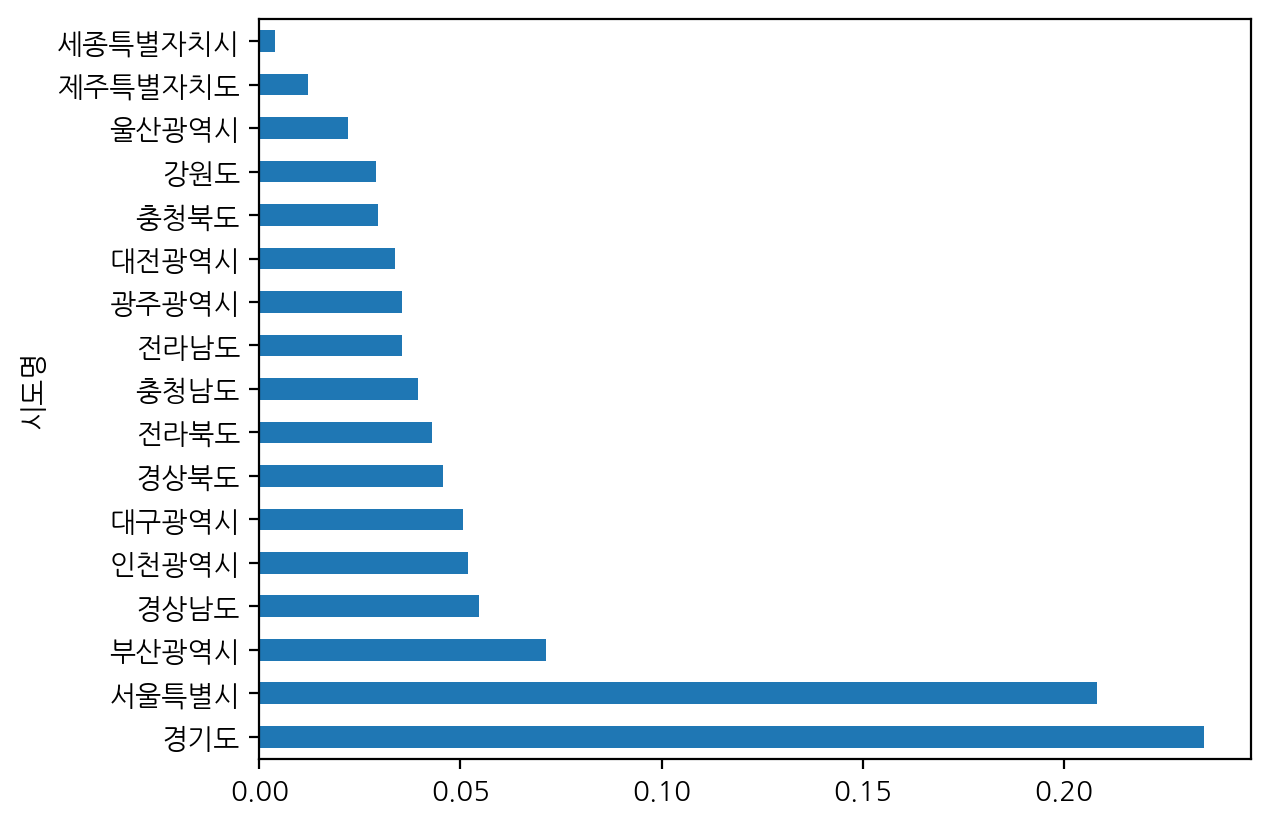

In [49]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 설치된 폰트 경로 지정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path)

# Matplotlib의 기본 폰트를 Nanum Gothic으로 설정
plt.rc('font', family='NanumGothic')


# 판다스의 plot.pie()를 사용해서 파이그래프를 그려봅니다.
city_normalize.plot.barh()

<Axes: ylabel='proportion'>

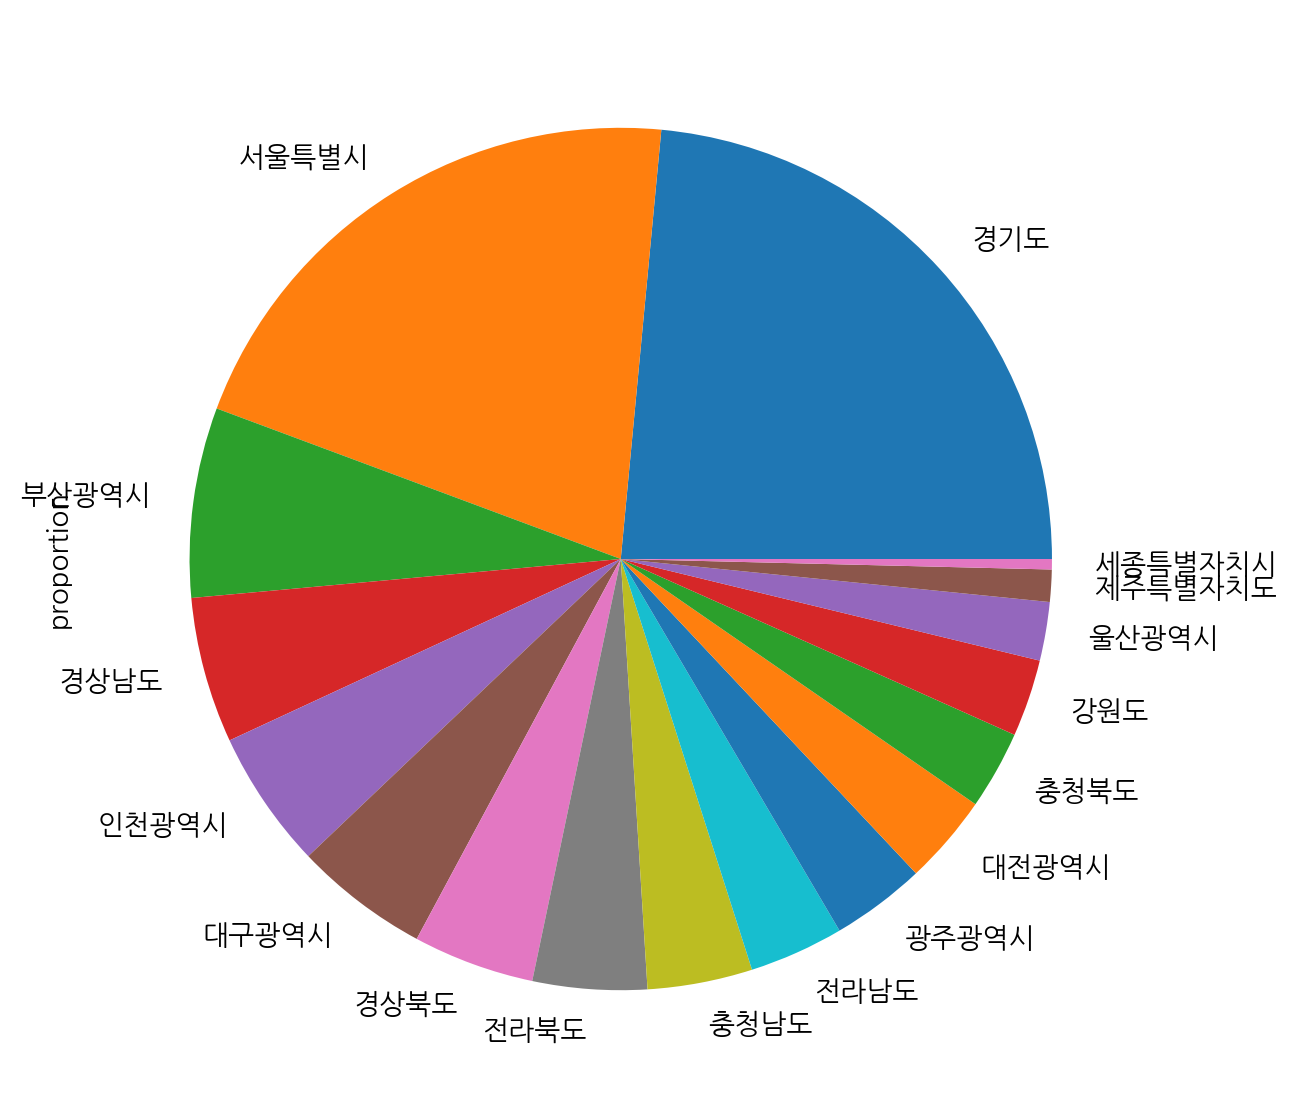

In [55]:
city_normalize.plot.pie(figsize=(7,7))

<Axes: xlabel='count', ylabel='시도명'>

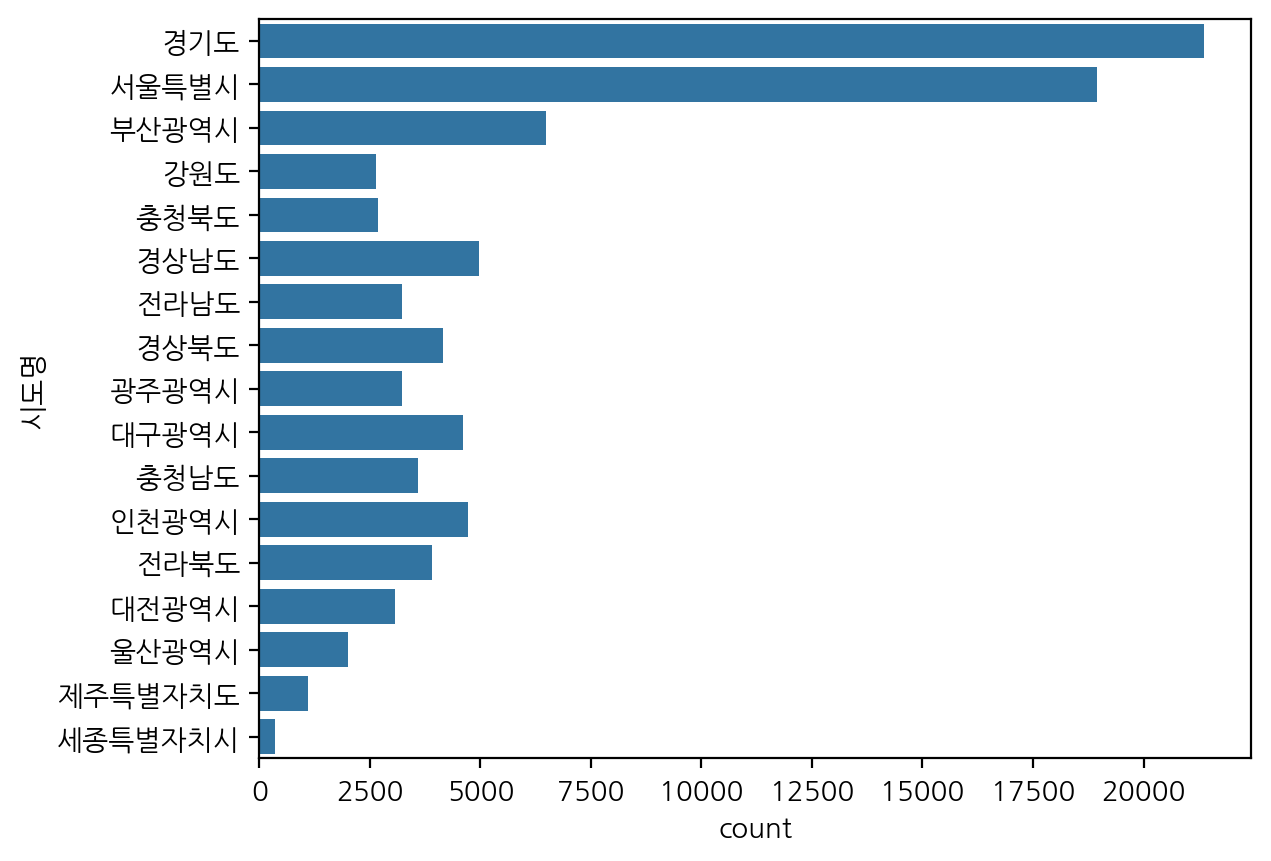

In [61]:
sns.countplot(data=df, y='시도명')

In [62]:
# "상권업종대분류명"으로 갯수를 세어봅니다.
df['상권업종대분류명'].value_counts()

상권업종대분류명
의료    91335
Name: count, dtype: int64

In [63]:
# "상권업종중분류명"으로 갯수를 세어봅니다.
c = df['상권업종중분류명'].value_counts()

In [64]:
# normalize=True 를 사용해 비율을 구해봅니다.
n = df['상권업종중분류명'].value_counts(normalize=True)

TypeError: Axes.bar() missing 2 required positional arguments: 'x' and 'height'

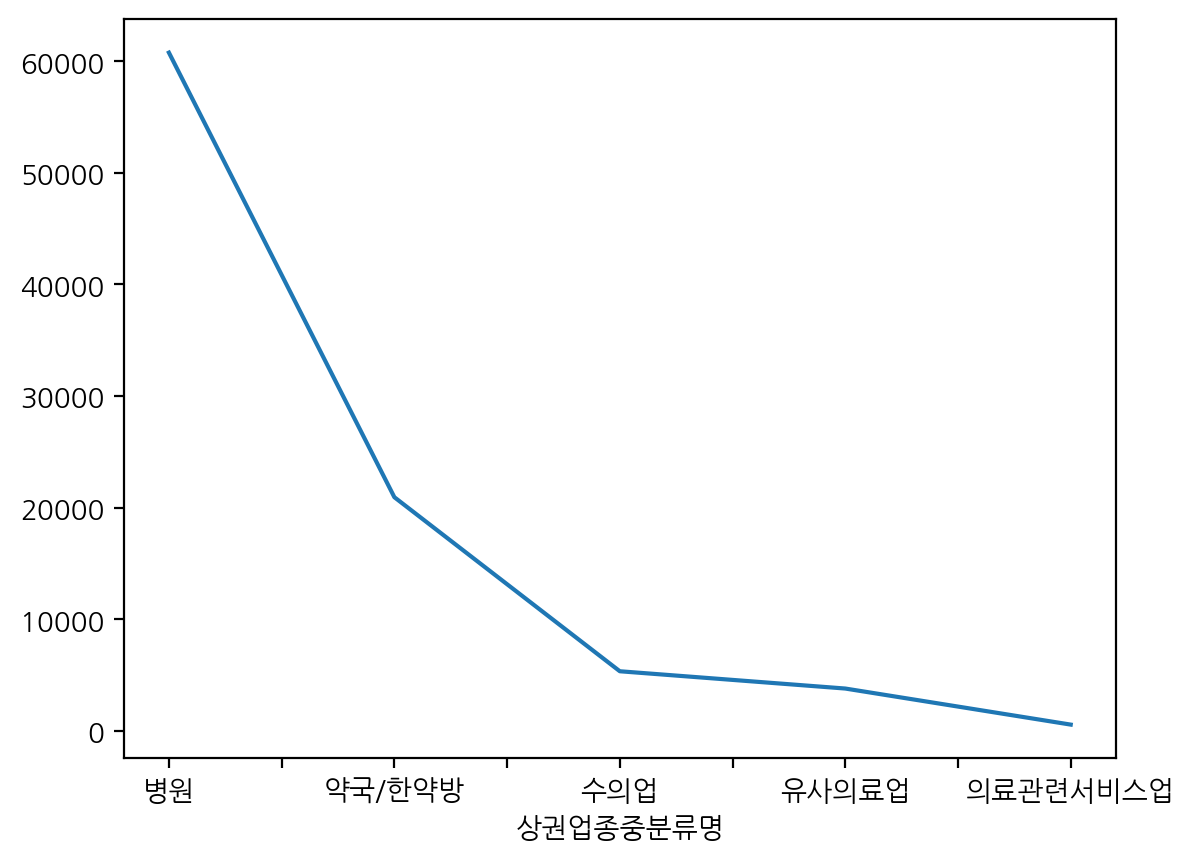

In [65]:
# 판다스의 plot.bar()를 사용해서 막대그래프를 그려봅니다.
c.plot().bar(rot=0)

<Axes: ylabel='proportion'>

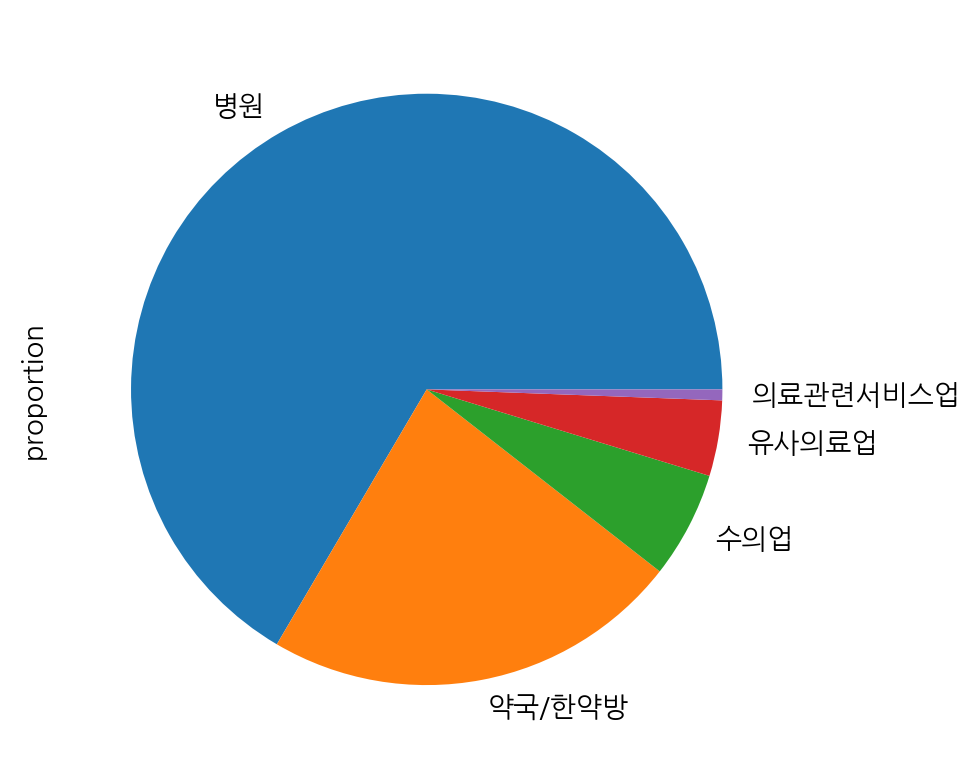

In [66]:
# 판다스의 plot.pie()를 사용해서 파이그래프를 그려봅니다.
n.plot.pie()

In [69]:
# "상권업종소분류명" 에 대한 그룹화 된 값을 카운트 합니다.
c = df['상권업종소분류명'].value_counts()

<Axes: xlabel='상권업종소분류명'>

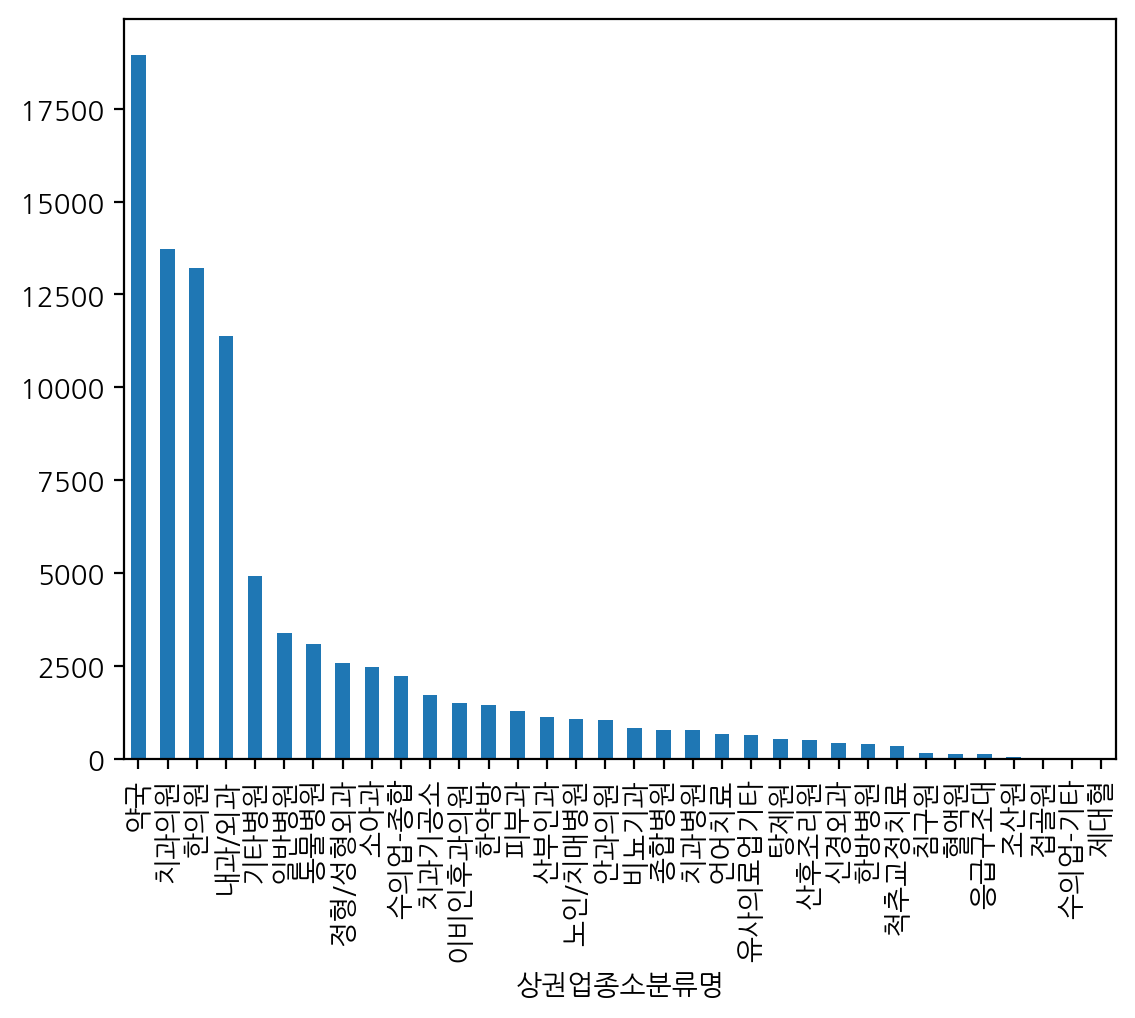

In [72]:
# "상권업종소분류명"으로 갯수를 세어봅니다.
# 판다스의 plot.bar()를 사용해서 막대그래프를 그려봅니다.
c.plot.bar()

## 데이터 색인하기
* 특정 데이터만 모아서 따로 봅니다.

In [77]:
# "상권업종중분류명"이 "약국/한약방"인 데이터만 가져와서
# df_medical 이라는 변수에 담아봅니다.
# 그리고 head()를 통해 미리보기를 합니다.

df_medical = df[df['상권업종중분류명'] == '약국/한약방'].copy()

In [76]:
df_medical.head()

상가업소번호        상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
4   20364049  더블유스토어수지점         S       의료       S02   약국/한약방    S02A01   
6   20733252      춘산한약방         S       의료       S02   약국/한약방    S02A02   
7   20582210      부부탕제원         S       의료       S02   약국/한약방    S02A03   
10  21057519       민생약국         S       의료       S02   약국/한약방    S02A01   
13  21217689     제중당한약방         S       의료       S02   약국/한약방    S02A02   

   상권업종소분류명   시도명    시군구코드  ...                     지번주소         도로명코드  \
4        약국   경기도  41465.0  ...   경기도 용인시 수지구 풍덕천동 712-2  4.146530e+11   
6       한약방   강원도  42110.0  ...         강원도 춘천시 중앙로2가 99  4.211040e+11   
7       탕제원  충청북도  43111.0  ...  충청북도 청주시 상당구 금천동 187-17  4.311150e+11   
10       약국  경상남도  48890.0  ...    경상남도 합천군 용주면 월평리 78-2  4.889050e+11   
13      한약방  전라남도  46830.0  ...     전라남도 영암군 도포면 덕화리 296  4.683050e+11   

                       도로명  건물본번지        건물관리번호                       도로명주소  \
4          경기도 용인시 수지구 문정로     32  4.146510e+24          경기도 용인시 수지구 문정로 32   
6              강원도 춘천시 낙원길     50  4.211010e+24              강원도 춘천시 낙원길 50   
7   충청북도 청주시 상당구 중고개로337번길    134  4.311110e+24  충청북도 청주시 상당구 중고개로337번길 134   
10        경상남도 합천군 용주면 월평길    149  4.889050e+24     경상남도 합천군 용주면 월평길 149-35   
13        전라남도 영암군 도포면 인덕길     75  4.683040e+24      전라남도 영암군 도포면 인덕길 75-10   

       구우편번호    신우편번호          경도         위도  
4   448170.0  16837.0  127.095522  37.323528  
6   200042.0  24273.0  127.726905  37.880504  
7   360802.0  28726.0  127.499206  36.625355  
10  678912.0  50212.0  128.118615  35.575962  
13  526832.0  58429.0  126.630348  34.834080  

[5 rows x 29 columns]

In [80]:
# "상권업종대분류명" 에서 "의료"만 가져옵니다.
# df.loc를 사용하면 행,열을 함께 가져올 수 있습니다.
# 이 기능을 통해 "상권업종중분류명" 만 가져옵니다.
# 그리고 가져온 결과를 value_counts 를 통해 중분류의 갯수를 세어봅니다.
# shop_type

df.loc[df['상권업종대분류명'] == '의료','상권업종중분류명'].value_counts()

상권업종중분류명
병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: count, dtype: int64

In [ ]:
# 위와 똑같은 기능을 수행하는 코드입니다. 아래와 같이 한 줄에 표현할 수도 있습니다.
# df.loc[df["상권업종대분류명"] == "의료", "상권업종중분류명"].value_counts()

In [88]:
# 유사의료업만 따로 모아봅니다.

df_medi = df[df['상권업종중분류명'] == '유사의료업']


In [83]:
# 상호명을 그룹화해서 갯수를 세어봅니다.
# value_counts 를 사용해서 상위 10개를 출력합니다.

df['상호명'].value_counts().head(10)

상호명
리원       152
온누리약국    149
경희한의원    141
우리약국     119
중앙약국     111
전자담배      98
조은약국      95
건강약국      87
제일약국      79
사랑약국      73
Name: count, dtype: int64

In [89]:
# 유사의료업만 df_medi 변수에 담겨져 있습니다.
# df_medi 변수에서 상호명으로 갯수를 세어봅니다.
# 가장 많은 상호 상위 10개를 출력해 봅니다.

df_medi['상호명'].value_counts().head()

상호명
리원         32
고려수지침      22
대한적십자사     17
헌혈의집       12
고려수지침학회    10
Name: count, dtype: int64

### 여러 조건으로 색인하기

In [93]:
# "상권업종소분류명"이 "약국" 인 것과
# "시도명" 이 "서울특별시"인 데이터만 가져옵니다.
# df_seoul_drug

df_seoul_drug = df[(df['상권업종소분류명'] == '약국') & (df['시도명'] == '서울특별시')]

In [94]:
df_seoul_drug

상가업소번호        상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
33     20816709      이즈타워약         S       의료       S02   약국/한약방    S02A01   
51     20855710       진흥약국         S       의료       S02   약국/한약방    S02A01   
130    21589838      신세계약국         S       의료       S02   약국/한약방    S02A01   
136    22388303    메디팜한솔약국         S       의료       S02   약국/한약방    S02A01   
141    22412563        명약국         S       의료       S02   약국/한약방    S02A01   
...         ...        ...       ...      ...       ...      ...       ...   
91239  16131547     우리이웃약국         S       의료       S02   약국/한약방    S02A01   
91275  16195709     더블유스토어         S       의료       S02   약국/한약방    S02A01   
91288  16131839      종각팜약국         S       의료       S02   약국/한약방    S02A01   
91301  16188650      온누리약국         S       의료       S02   약국/한약방    S02A01   
91322  16091491  설연화한복감성약방         S       의료       S02   약국/한약방    S02A01   

      상권업종소분류명    시도명    시군구코드  ...                    지번주소         도로명코드  \
33          약국  서울특별시  11680.0  ...       서울특별시 강남구 역삼동 821  1.168030e+11   
51          약국  서울특별시  11740.0  ...       서울특별시 강동구 둔촌동 630  1.174030e+11   
130         약국  서울특별시  11260.0  ...       서울특별시 중랑구 신내동 646  1.126030e+11   
136         약국  서울특별시  11200.0  ...       서울특별시 성동구 행당동 346  1.120030e+11   
141         약국  서울특별시  11230.0  ...  서울특별시 동대문구 휘경동 286-121  1.123040e+11   
...        ...    ...      ...  ...                     ...           ...   
91239       약국  서울특별시  11290.0  ...      서울특별시 성북구 종암동 34-3  1.129040e+11   
91275       약국  서울특별시  11530.0  ...       서울특별시 구로구 구로동 501  1.153030e+11   
91288       약국  서울특별시  11110.0  ...     서울특별시 종로구 종로2가 84-8  1.111030e+11   
91301       약국  서울특별시  11530.0  ...    서울특별시 구로구 구로동 798-30  1.153040e+11   
91322       약국  서울특별시  11260.0  ...      서울특별시 중랑구 묵동 174-1  1.126030e+11   

                      도로명  건물본번지        건물관리번호                  도로명주소  \
33         서울특별시 강남구 테헤란로    101  1.168010e+24     서울특별시 강남구 테헤란로 101   
51          서울특별시 강동구 명일로    172  1.174010e+24      서울특별시 강동구 명일로 172   
130         서울특별시 중랑구 신내로    211  1.126010e+24      서울특별시 중랑구 신내로 211   
136         서울특별시 성동구 행당로     82  1.120010e+24       서울특별시 성동구 행당로 82   
141    서울특별시 동대문구 망우로18나길      3  1.123010e+24   서울특별시 동대문구 망우로18나길 3   
...                   ...    ...           ...                    ...   
91239     서울특별시 성북구 종암로5길     26  1.129010e+24     서울특별시 성북구 종암로5길 26   
91275     서울특별시 구로구 구로중앙로    134  1.153010e+24    서울특별시 구로구 구로중앙로 134   
91288        서울특별시 종로구 종로     68  1.111010e+24        서울특별시 종로구 종로 68   
91301   서울특별시 구로구 디지털로27길    116  1.153010e+24  서울특별시 구로구 디지털로27길 116   
91322       서울특별시 중랑구 공릉로     28  1.126010e+24       서울특별시 중랑구 공릉로 28   

          구우편번호   신우편번호          경도         위도  
33     135080.0  6134.0  127.028023  37.498656  
51     134767.0  5360.0  127.145055  37.534135  
130    131130.0  2024.0  127.092597  37.616424  
136    133777.0  4717.0  127.027513  37.556238  
141    130090.0  2498.0  127.060556  37.587349  
...         ...     ...         ...        ...  
91239  136769.0  2811.0  127.033907  37.594792  
91275  152731.0  8293.0  126.884285  37.499936  
91288  110122.0  3189.0  126.984930  37.569882  
91301  152875.0  8374.0  126.888070  37.484897  
91322  131848.0  2034.0  127.078082  37.613194  

[3579 rows x 29 columns]

### 구별로 보기

In [98]:
# 위에서 색인한 데이터로 "시군구명"으로 그룹화 해서 갯수를 세어봅니다.
# 구별로 약국이 몇개가 있는지 확인해 봅니다.

c = df_seoul_drug['시군구명'].value_counts()
c.head()

시군구명
강남구     374
동대문구    261
광진구     212
서초구     191
송파구     188
Name: count, dtype: int64

In [101]:
# normalize=True 를 통해 비율을 구해봅니다.
n = df_seoul_drug['시군구명'].value_counts(normalize=True)

<Axes: xlabel='시군구명'>

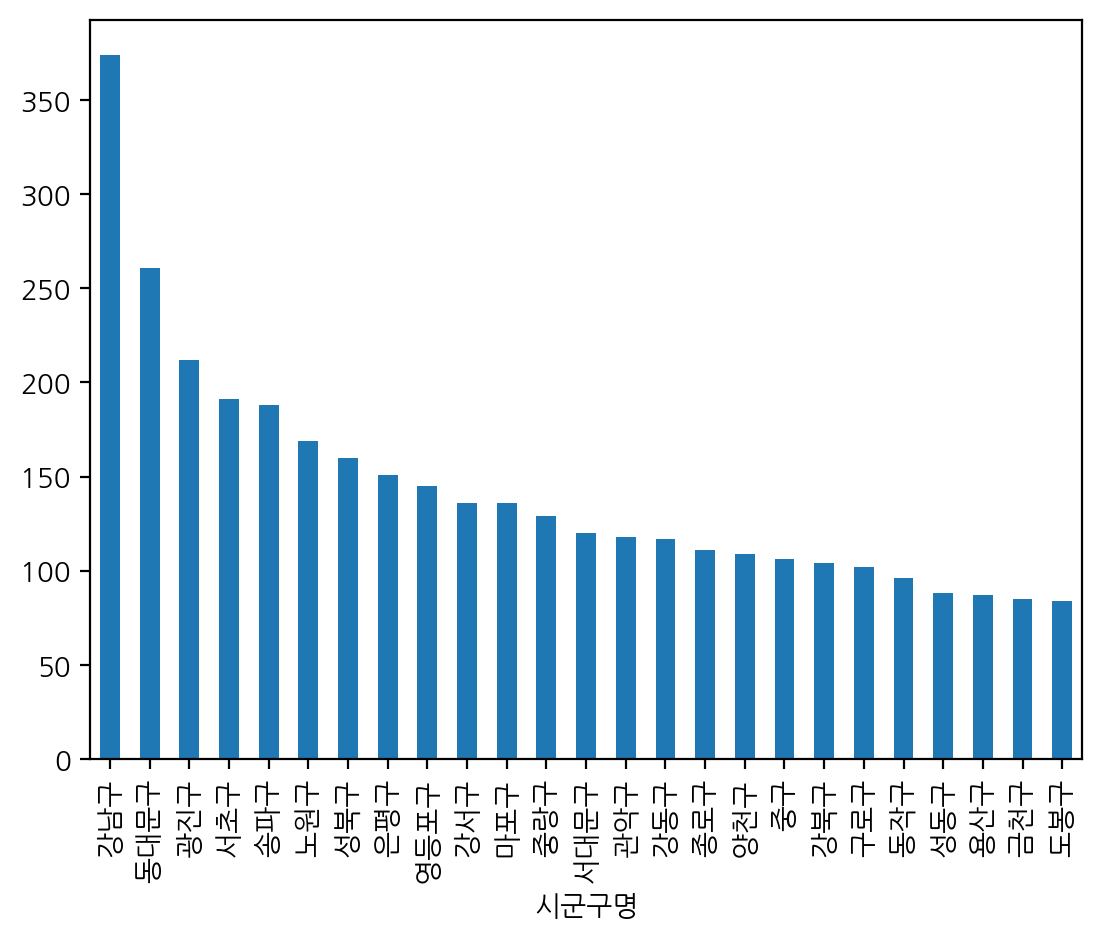

In [102]:
# 위에서 구한 결과를 판다스의 plot.bar()를 활용해 막대그래프로 그립니다.

c.plot.bar()

In [106]:
# "상권업종소분류명"이 "종합병원" 인 것과
# "시도명" 이 "서울특별시"인 데이터만 가져옵니다.
# df_seoul_hospital

df_seoul_hospital = df[(df['상권업종소분류명'] == '종합병원') & (df['시도명'] == '서울특별시')].copy()

In [108]:
# "시군구명" 으로 그룹화 해서 구별로 종합병원의 수를 세어봅니다.
df_seoul_hospital['시군구명'].value_counts()

시군구명
강남구     15
영등포구     8
광진구      6
서초구      6
강동구      5
중구       5
송파구      5
강북구      4
도봉구      4
서대문구     4
양천구      4
성북구      3
강서구      2
중랑구      2
종로구      2
동대문구     2
구로구      2
노원구      2
금천구      2
성동구      2
관악구      2
동작구      1
마포구      1
용산구      1
은평구      1
Name: count, dtype: int64

### 텍스트 데이터 색인하기

In [113]:
# str.contains 를 사용해서 "상호명"에 "대학병원"이 들어가는 것을 가져와서 head()로 미리보기 합니다.
df_seoul_hospital.loc[-df_seoul_hospital['상호명'].str.contains('종합병원'), '상호명'].unique()

array(['대진의료재단', '홍익병원별관', 'SNUH', '평화드림여의도성모병원의료기매장', '한양', '백산의료재단친구병원',
       '서울보훈병원', '서울성모병원장례식장꽃배달', '서울대학교병원', '알콜중독및정신질환상담소',
       '강남성모병원장례식장꽃배달', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '원자력병원장례식장', '국민의원', '고려대학교구로병원', '학교법인일송학원',
       '삼성의료원장례식장', '희명스포츠의학센터인공신장실', '연세대학교의과대학강남세브란스', '국립정신병원',
       '코아클리닉', '수서제일의원', '사랑의의원', '한국전력공사부속한일병원', '신촌연세병원', '창동제일의원',
       '영동세브란스병원', '제일성심의원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울이의원',
       '서울대학교병원비상계획외래', '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '독일의원',
       '서울연합의원', '우신향병원', '동부제일병원', '아산재단금강병원', '명곡안연구소', '아산재단서울중앙병원',
       '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원', '한국건강관리협회서울특',
       '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', '실로암의원', 'Y&T성모마취과', '광진성모의원',
       '서울현대의원', '이노신경과의원', '송정훼밀리의원', '서울중앙의원', '영남의료재단', '인제대학교서울백병원',
       '한국필의료재단', '세브란스의원', '가톨릭대학교성바오로병원장례식장', '서울연세의원', '사랑의병원',
       '성삼의료재단미즈메디병원', '씨엠충무병원', '성신의원', '원진재단부설녹색병원', '송파제일의원',
       '카톨릭성모의원', '한양성심의원', '관악

In [115]:
drop_row = df_seoul_hospital[df_seoul_hospital['상호명'].str.contains('꽃배달|의료기|장례식장|상담소|어린이집')].index

In [116]:
drop_row = drop_row.tolist()

In [117]:
drop_row2 = df_seoul_hospital[df_seoul_hospital['상호명'].str.endswith('의원')].index

In [118]:
drop_row2 = drop_row2.tolist()

In [119]:
drop_row2

[8479,
 12854,
 13715,
 14966,
 16091,
 18047,
 20200,
 20415,
 30706,
 32889,
 34459,
 34720,
 35696,
 37251,
 45120,
 49626,
 51575,
 55133,
 56320,
 56404,
 56688,
 57551,
 62113,
 76508]

In [121]:
drop_row = drop_row + drop_row2

In [122]:
len(drop_row)

33

In [128]:
df_seoul_hospital =  df_seoul_hospital.drop(drop_row, axis=0 )

In [129]:
df_seoul_hospital.shape

(58, 29)

In [ ]:
# str.startswith 를 사용해 "서울"로 시작하는 도로명주소를 가져와서 head()로 미리보기 합니다.


In [ ]:
# str.endswith를 사용해서 "상호명"이 "병원"으로 끝나는 데이터를 가져와서 head()로 미리보기 합니다.


<Axes: xlabel='시군구명', ylabel='count'>

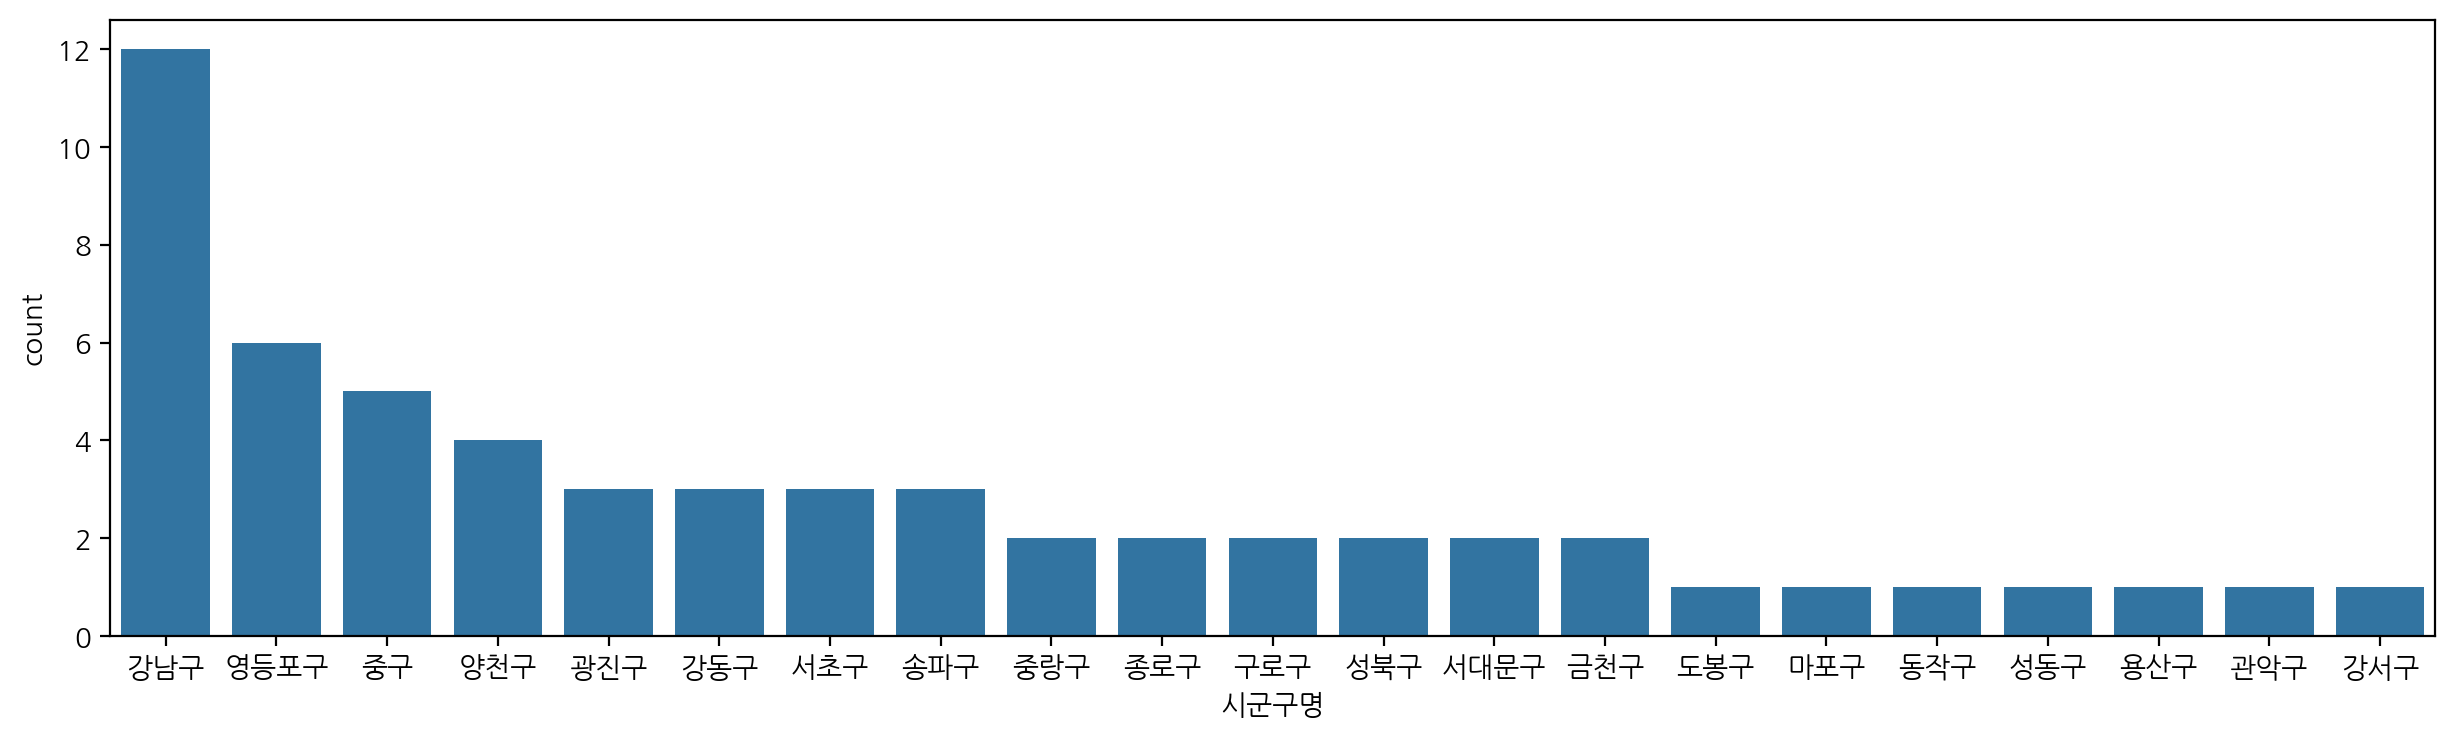

In [133]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_seoul_hospital, x='시군구명', order=df_seoul_hospital['시군구명'].value_counts().index)

In [134]:
df_seoul_hospital['상호명'].unique()

array(['대진의료재단', '홍익병원별관', 'SNUH', '한양', '백산의료재단친구병원', '서울보훈병원',
       '서울대학교병원', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '고려대학교구로병원', '학교법인일송학원', '희명스포츠의학센터인공신장실',
       '연세대학교의과대학강남세브란스', '국립정신병원', '코아클리닉', '한국전력공사부속한일병원', '신촌연세병원',
       '영동세브란스병원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울대학교병원비상계획외래',
       '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '우신향병원', '동부제일병원', '아산재단금강병원',
       '명곡안연구소', '아산재단서울중앙병원', '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원',
       '한국건강관리협회서울특', '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', 'Y&T성모마취과',
       '영남의료재단', '인제대학교서울백병원', '한국필의료재단', '사랑의병원', '성삼의료재단미즈메디병원',
       '씨엠충무병원', '원진재단부설녹색병원', '강남센트럴병원', '우리들병원', '건국대학교병원', '서울적십자병원',
       '서울성모병원응급의료센터', '가톨릭대학교여의도성모병원', '씨엠병원'], dtype=object)

### 특정 지역만 보기

In [135]:
# 서울에 있는 데이터의 위도와 경도를 봅니다.
# 결과를 df_seoul 이라는 데이터프레임에 저장합니다.
# 새로운 변수에 데이터프레임을 저장시 copy()를 사용합니다.
# df_seoul

df_seoul = df[df['시도명'] == '서울특별시'].copy()
df_seoul.shape


(18943, 29)

In [137]:
df_seoul['시군구명'].value_counts()

시군구명
강남구     3120
서초구     1491
동대문구    1152
송파구     1021
광진구      935
강서구      799
노원구      741
은평구      739
영등포구     731
성북구      708
강동구      703
마포구      649
관악구      578
중구       576
양천구      574
서대문구     543
중랑구      497
종로구      492
동작구      489
성동구      482
구로구      451
도봉구      412
강북구      396
용산구      361
금천구      303
Name: count, dtype: int64

<Axes: xlabel='시군구명'>

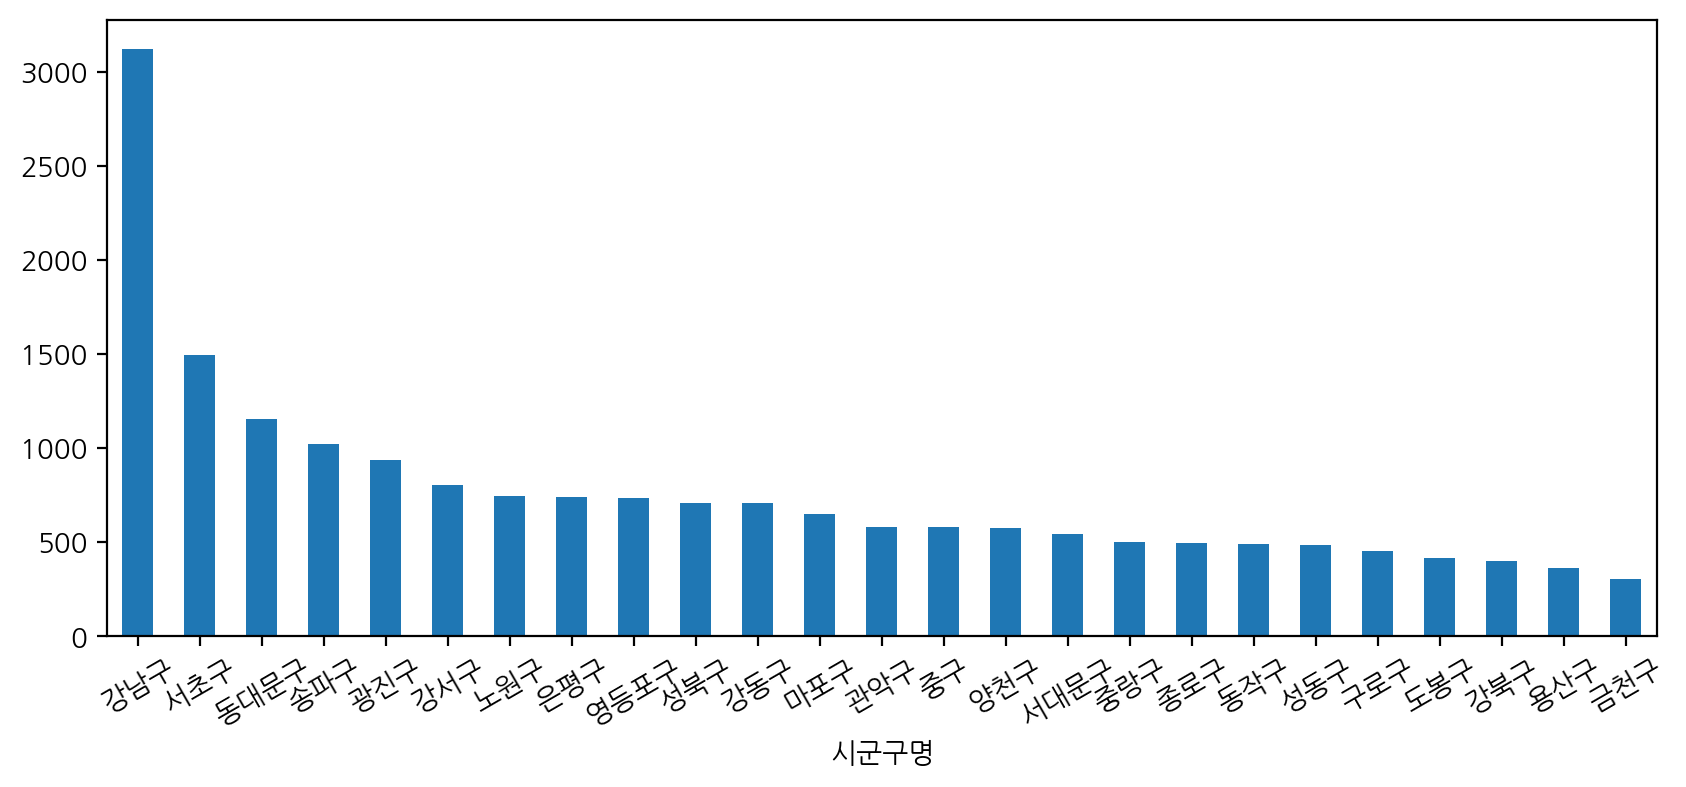

In [138]:
# seaborn 의 countplot 을 사용해서 위에서 만든 df_seoul 데이터프레임의
# 시군구명을 시각화 합니다.
plt.figure(figsize=(9, 6))
df_seoul["시군구명"].value_counts().plot.bar(figsize=(10, 4), rot=30)

<Axes: xlabel='시군구명', ylabel='count'>

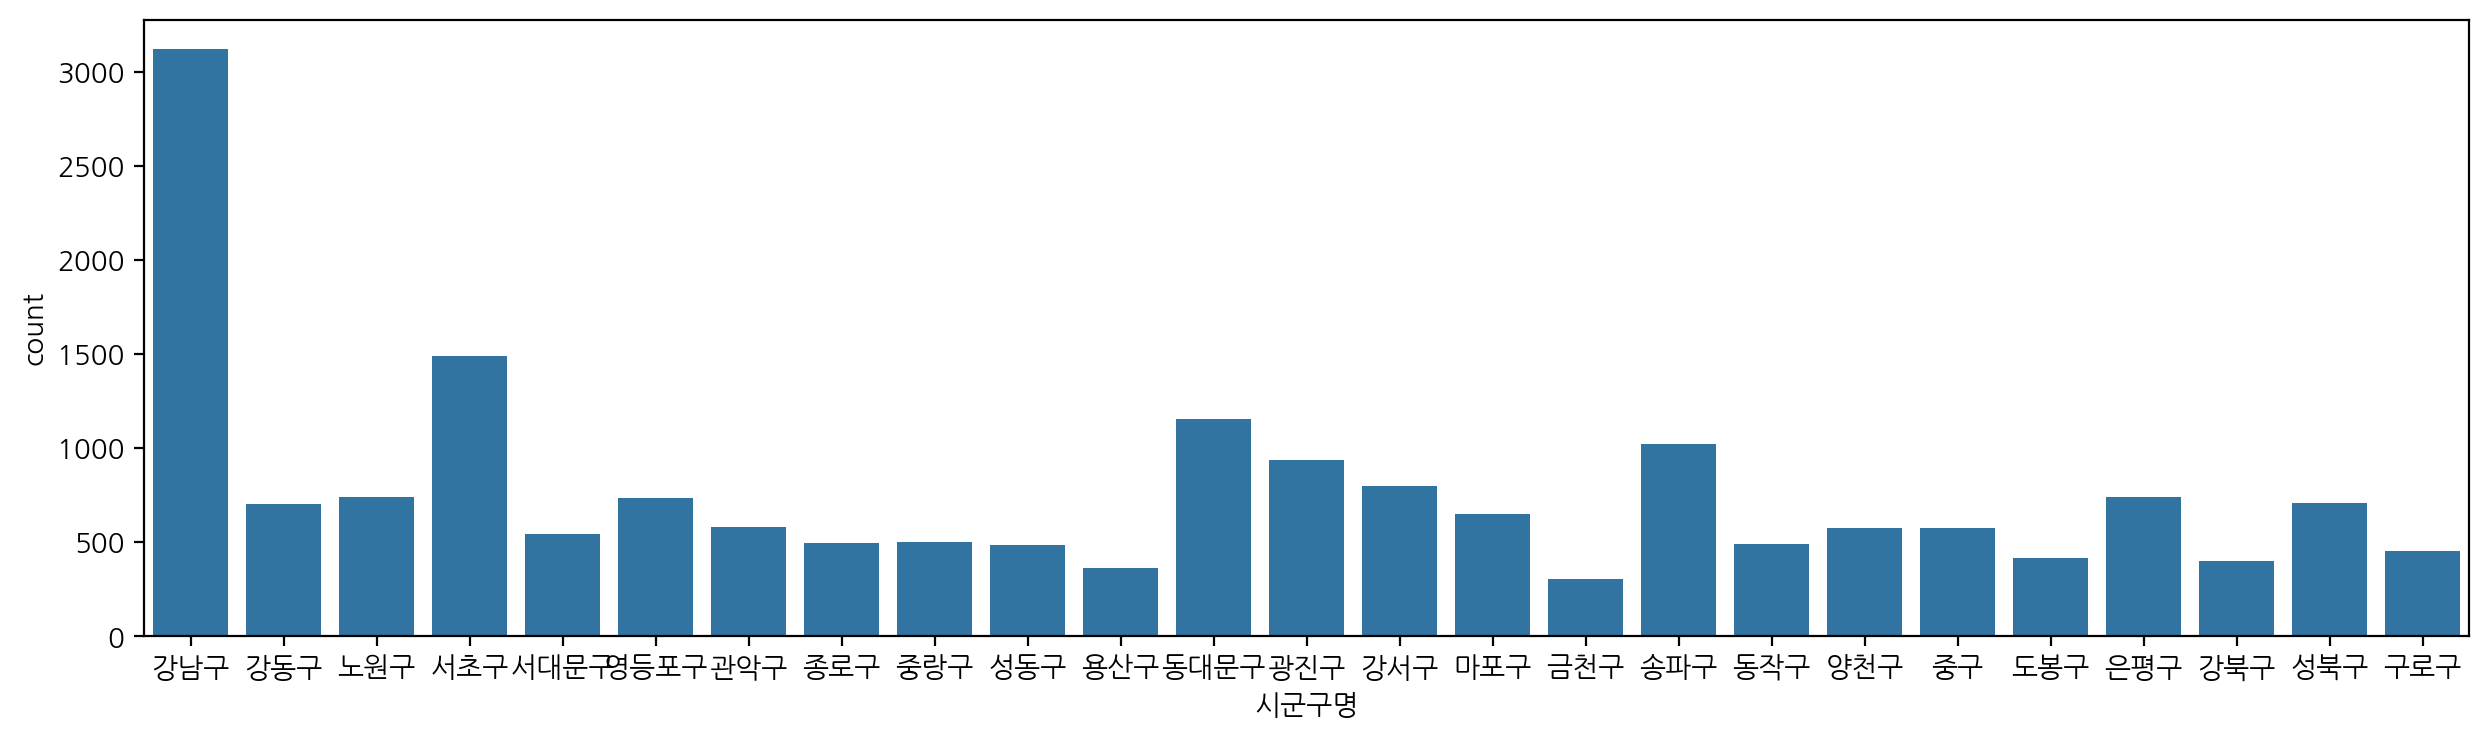

In [139]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df_seoul, x="시군구명")


In [143]:
df_seoul[['경도', '위도', '시군구명']]

경도         위도  시군구명
1      127.053198  37.488742   강남구
8      127.028531  37.522223   강남구
9      127.027878  37.514144   강남구
31     127.126507  37.537333   강동구
33     127.028023  37.498656   강남구
...           ...        ...   ...
91318  127.045802  37.583788  동대문구
91319  126.886122  37.475986   금천구
91320  127.057988  37.629326   노원구
91322  127.078082  37.613194   중랑구
91333  127.143958  37.540993   강동구

[18943 rows x 3 columns]

<Axes: xlabel='경도', ylabel='위도'>

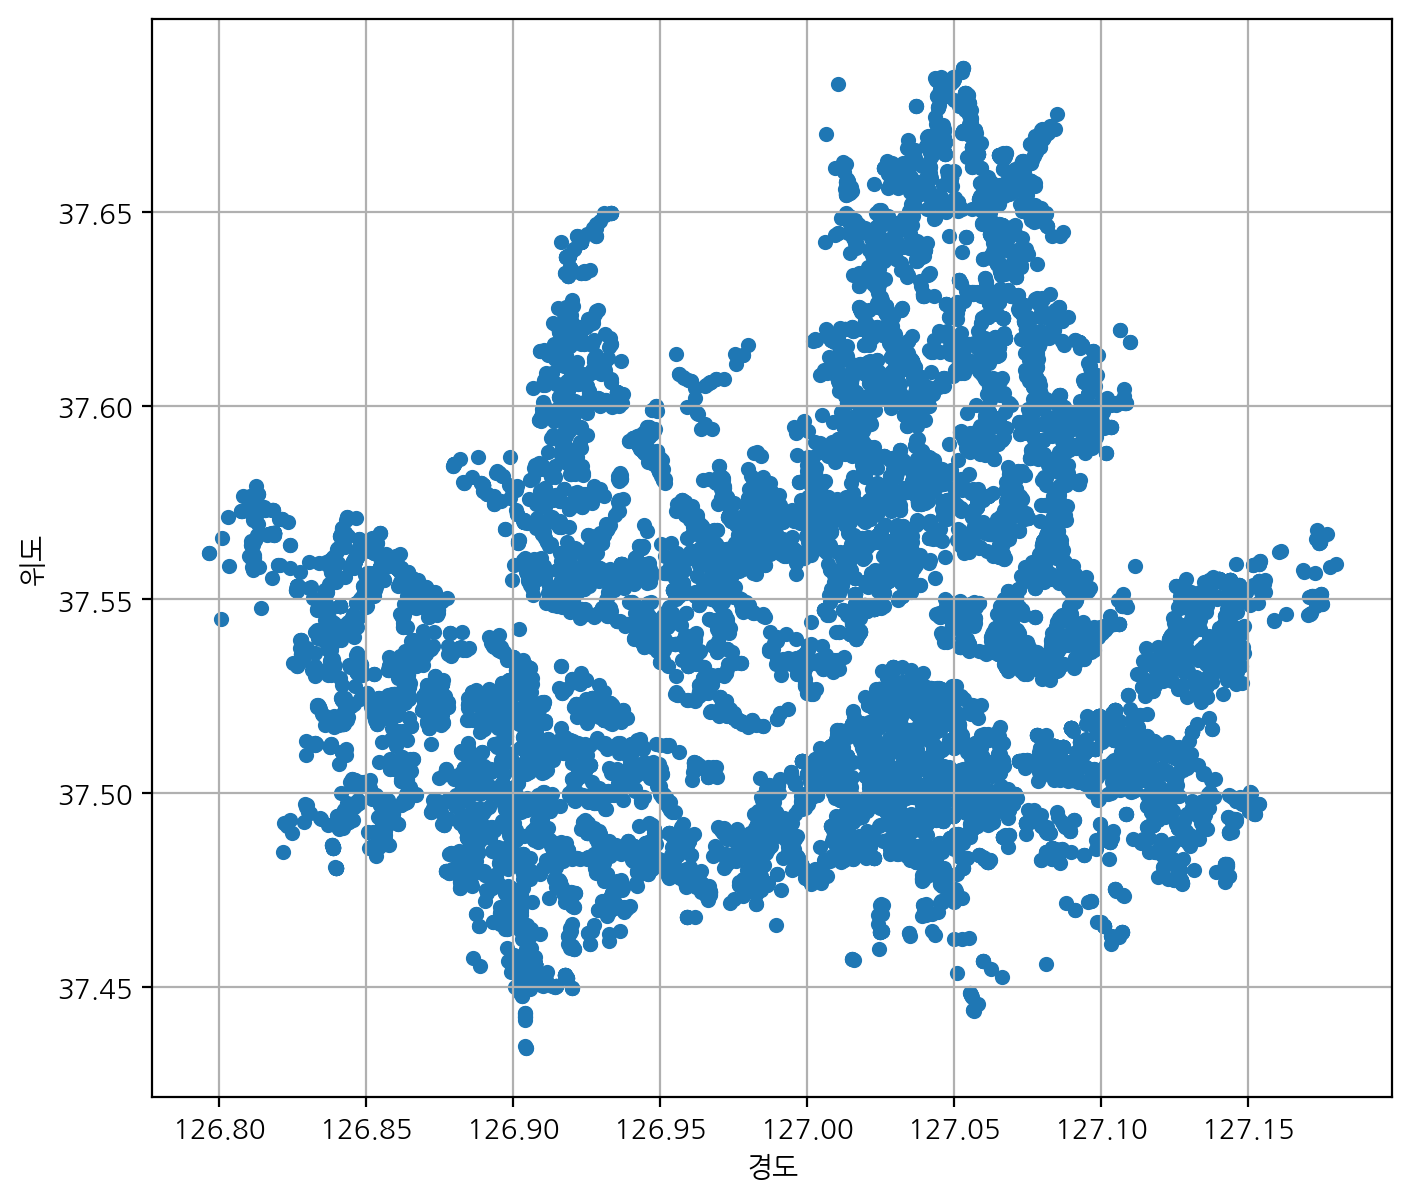

In [141]:
# Pandas 의 plot.scatter 를 통해 경도와 위도를 표시해 봅니다.
df_seoul[['경도', '위도', '시군구명']].plot.scatter(x='경도', y='위도', figsize=(8,7), grid=True)

<Axes: xlabel='경도', ylabel='위도'>

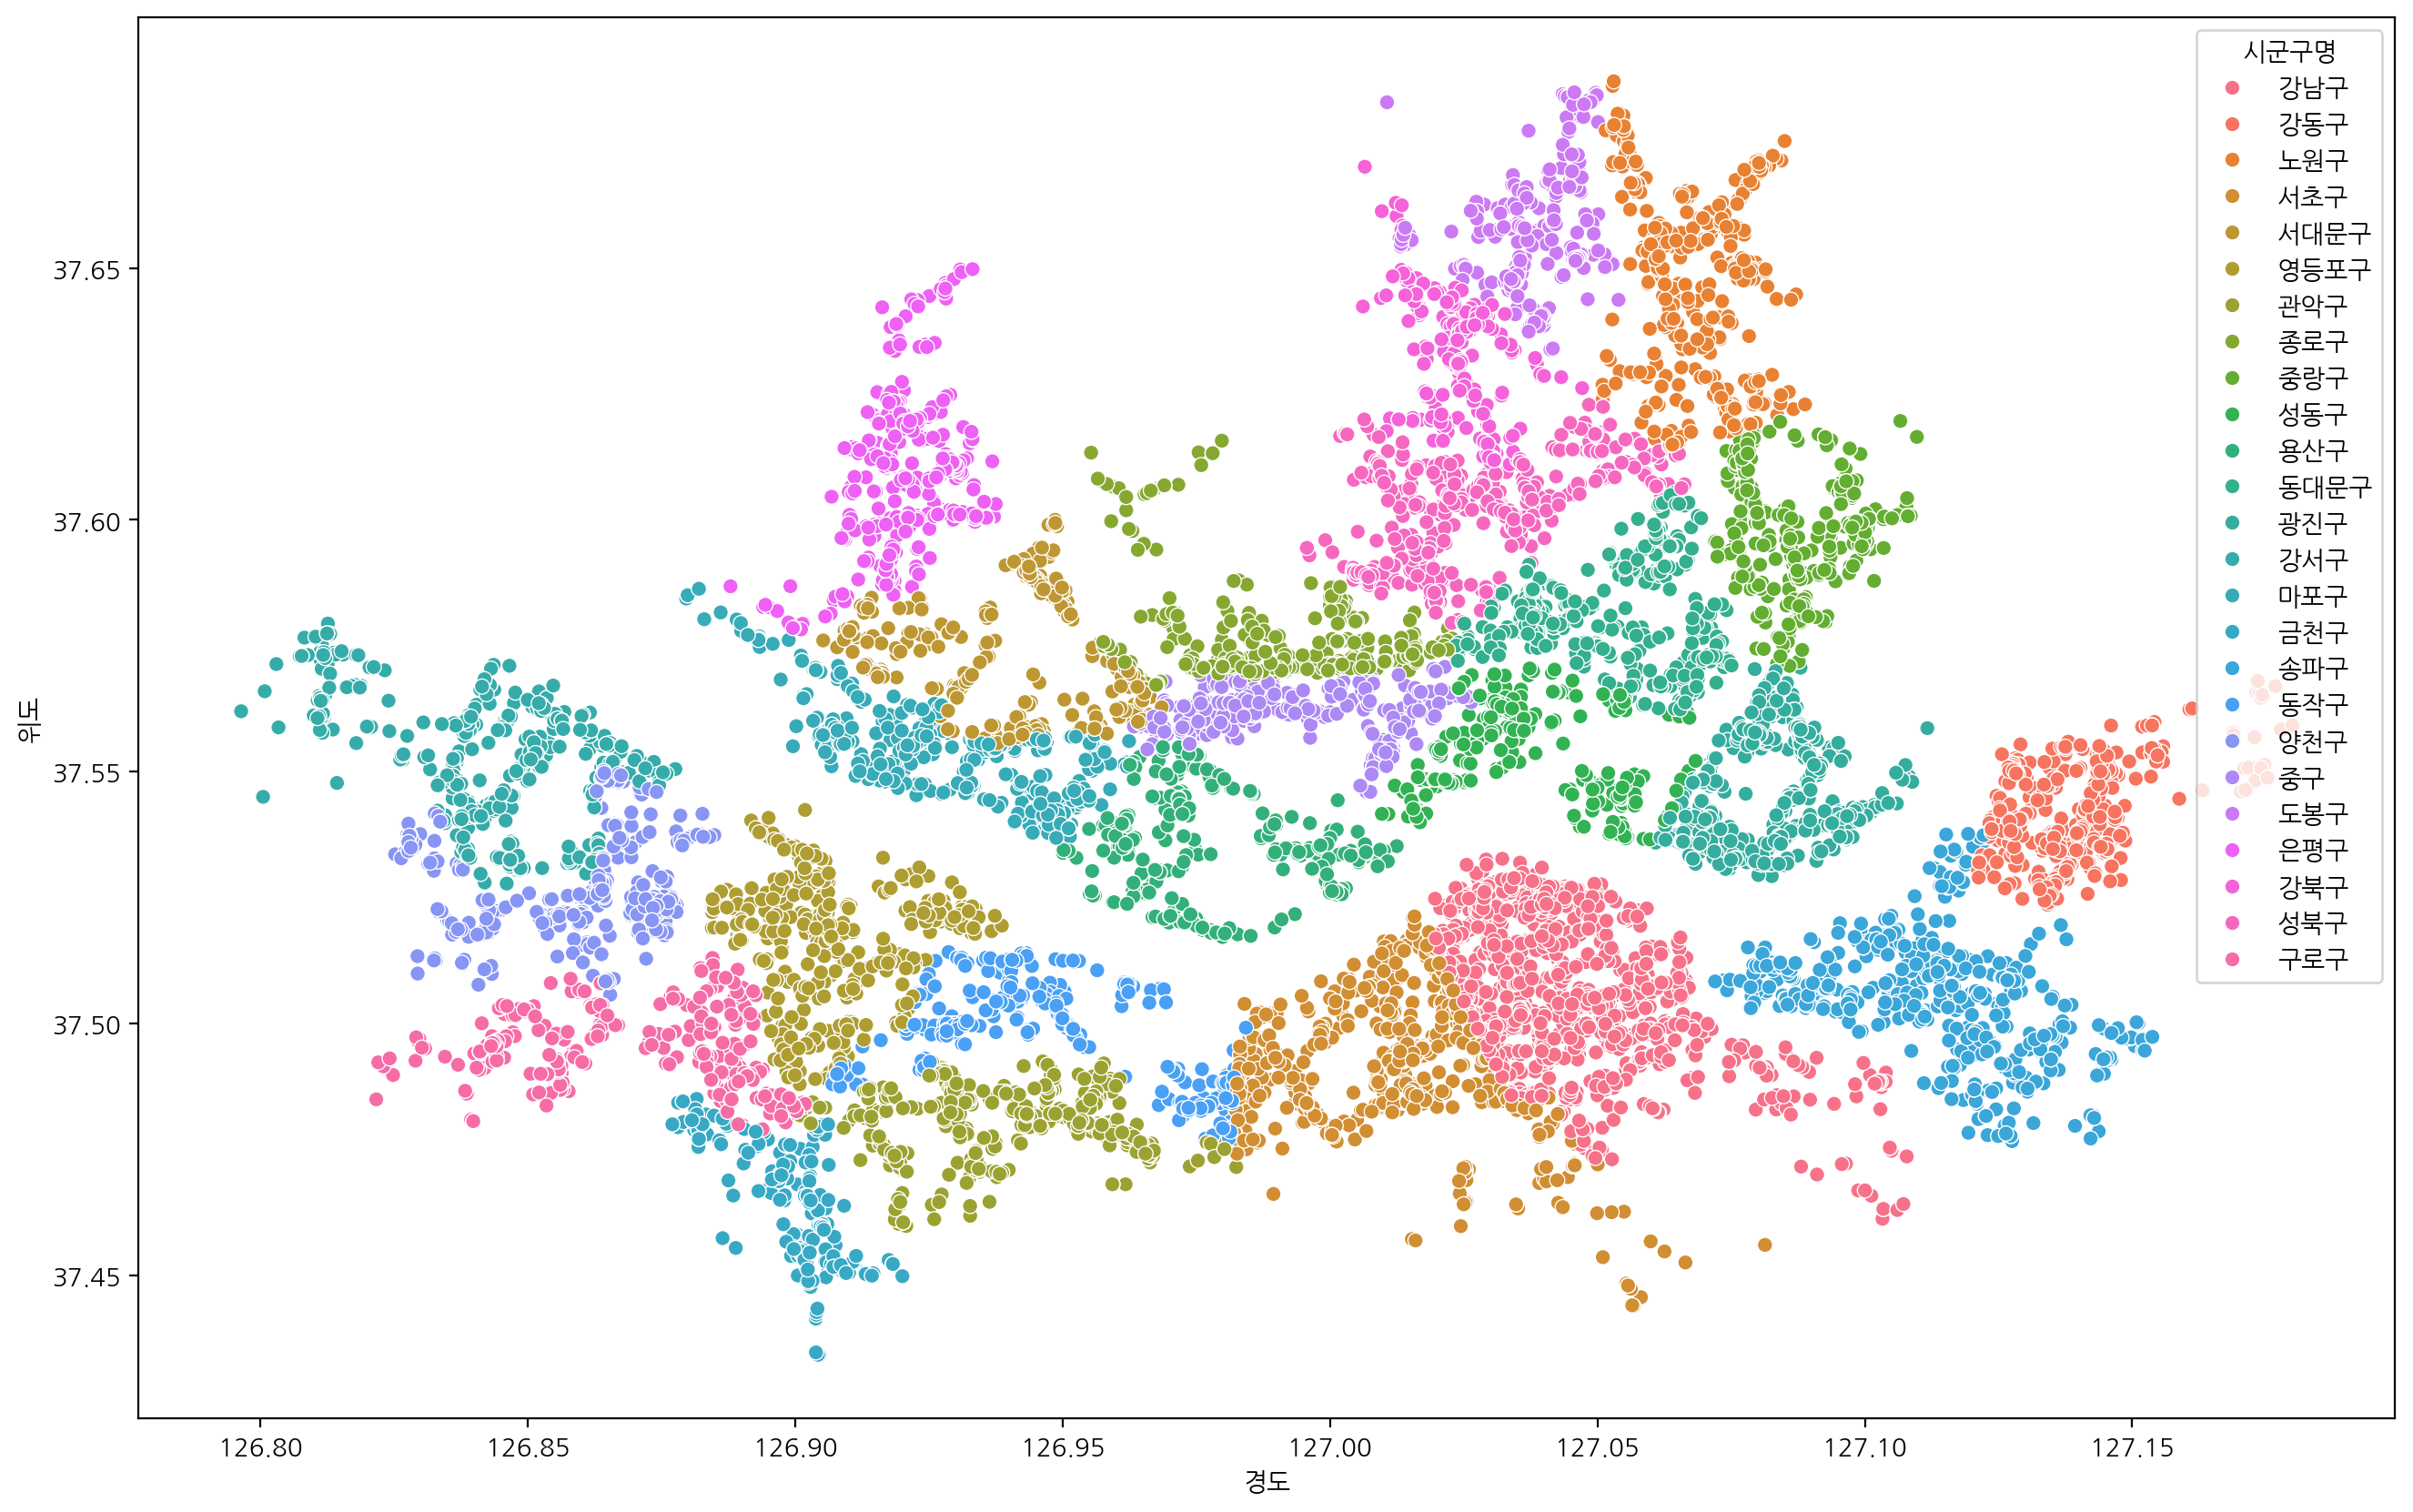

In [146]:
# seaborn의 scatterplot 을 통해 구별 경도와 위도를 표시해 봅니다.
plt.figure(figsize=(16, 10))
sns.scatterplot(data=df_seoul, x='경도', y='위도', hue='시군구명')

<Axes: xlabel='경도', ylabel='위도'>

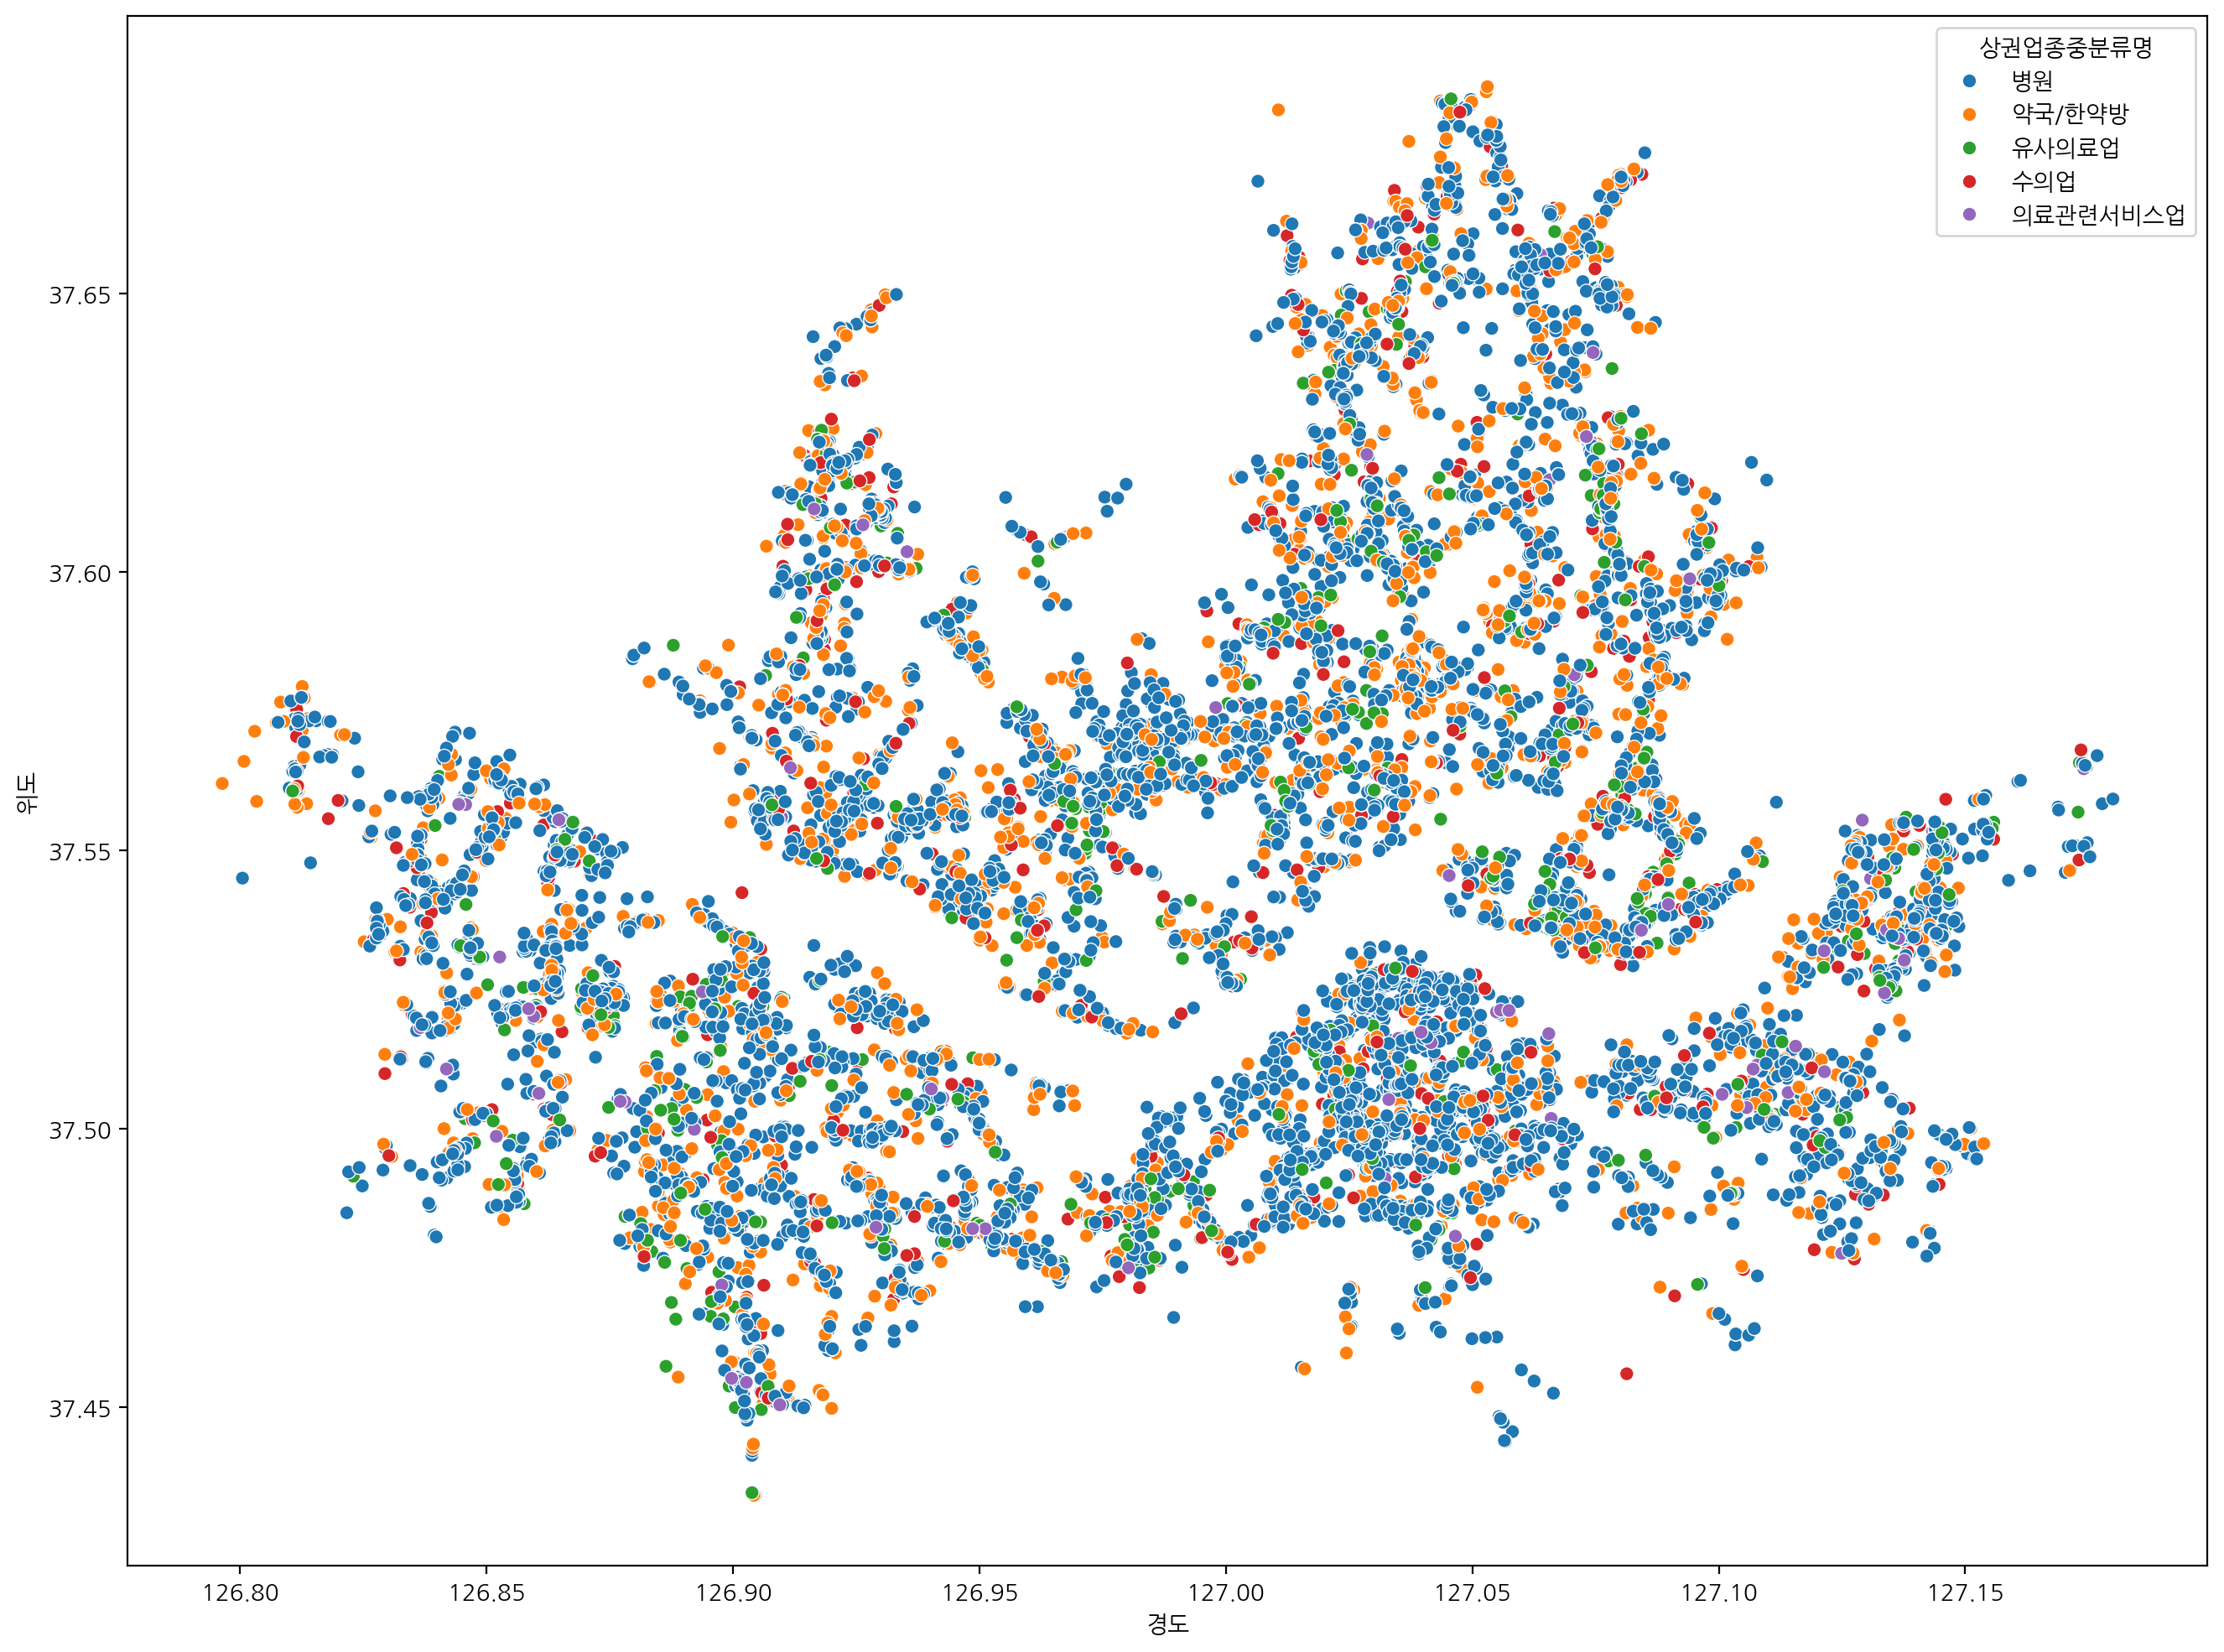

In [147]:
# seaborn의 scatterplot 을 통해 "상권업종중분류명" 경도와 위도를 표시해 봅니다.
plt.figure(figsize=(16, 12))
sns.scatterplot(data=df_seoul, x='경도', y='위도', hue='상권업종중분류명')

<Axes: xlabel='경도', ylabel='위도'>

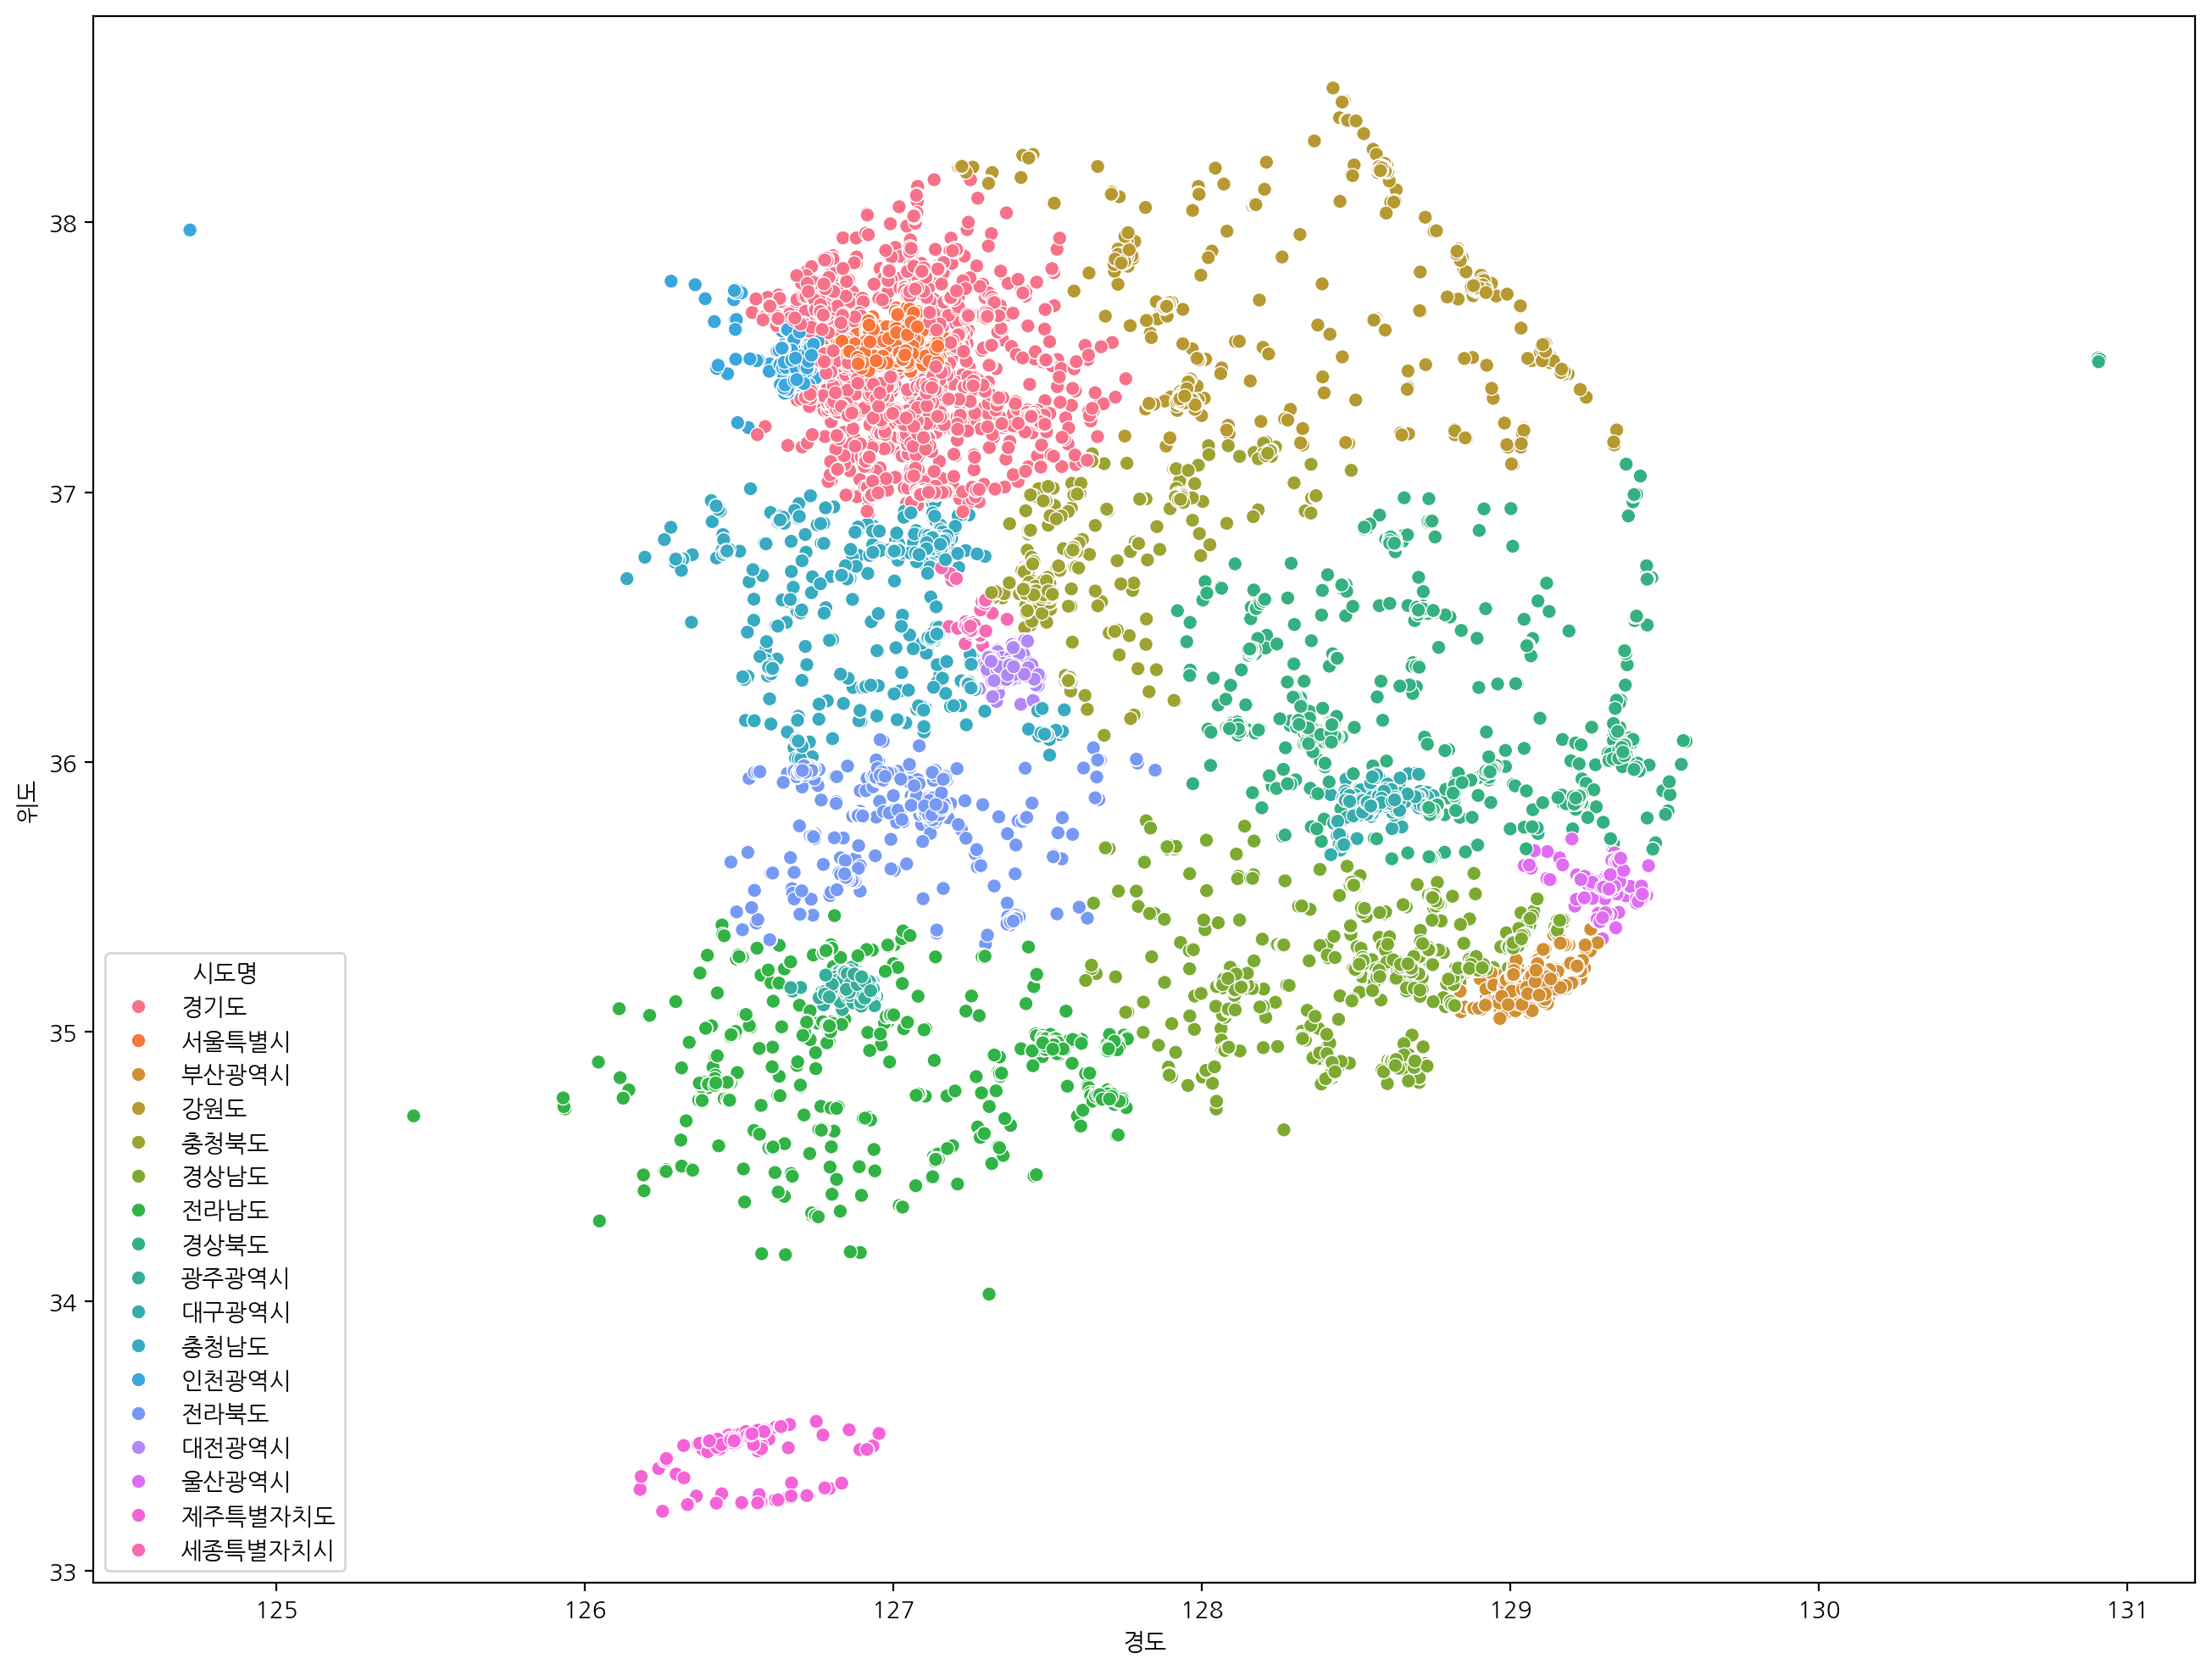

In [149]:
# seaborn의 scatterplot 을 통해 전국 데이터(df)로 구별 경도와 위도를 표시해 봅니다.
plt.figure(figsize=(16, 12))
sns.scatterplot(data=df, x='경도', y='위도', hue='시도명')


## Folium 으로 지도 활용하기
* 다음의 프롬프트 창을 열어 conda 명령어로 설치합니다.
<img src="https://t1.daumcdn.net/cfile/tistory/99576B4A5B751DC902">

검은색 프롬프트 창에 아래 명령어를 통해 folium 을 설치합니다.


`conda install -c conda-forge folium`

### Folium 사용예제
http://nbviewer.jupyter.org/github/python-visualization/folium/tree/main/examples/


In [152]:
# 아나콘다에서 folium 을 사용하기 위해서는 별도의 설치가 필요
# https://anaconda.org/conda-forge/folium
# conda install -c conda-forge folium
# 지도 시각화를 위한 라이브러리


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'conda-forge'


In [153]:
# geo_df 에 df_seoul_hospital 을 copy() 로 복사해서 할당합니다.
import folium

folium.Map()

In [160]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구합니다.
map = folium.Map(location=[df_seoul_hospital["위도"].mean(), df_seoul_hospital["경도"].mean()], zoom_start=12)

In [161]:
df_seoul_hospital.head(1)

상가업소번호     상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
305  25155642  대진의료재단         S       의료       S01       병원    S01B01   

    상권업종소분류명    시도명    시군구코드  ...                 지번주소         도로명코드  \
305     종합병원  서울특별시  11215.0  ...  서울특별시 광진구 중곡동 58-25  1.121530e+11   

                도로명  건물본번지        건물관리번호               도로명주소     구우편번호  \
305  서울특별시 광진구 긴고랑로    119  1.121510e+24  서울특별시 광진구 긴고랑로 119  143220.0   

      신우편번호          경도         위도  
305  4944.0  127.088279  37.559048  

[1 rows x 29 columns]

In [162]:
for n in df_seoul_hospital.index:
    name = df_seoul_hospital.loc[n, "상호명"]
    address = df_seoul_hospital.loc[n, "도로명주소"]
    popup = f"{name}-{address}"
    location = [df_seoul_hospital.loc[n, "위도"], df_seoul_hospital.loc[n, "경도"]]
    folium.Marker(
        location = location,
        popup = popup,
    ).add_to(map)
map


## 좀 더 분석해 보기
* 상권업종중분류명, 상권업종소분류명 중에 관심 있는 분류명을 색인 후에 시도별, 시군구별 분석을 해보세요.
* 예시)
    * 언어치료는 시군구별로 어디에 많이 위치할까?
    * 의료시설은 서울과 강남에 집중되어 있을까?
    * 강남에는 피부과, 성형외과가 다른 지역에 비해 많을까?